# Avocado Project

## Project Description

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

* Date - The date of the observation
* AveragePrice - the average price of a single avocado
* type - conventional or organic
* year - the year
* Region - the city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

Dataset Link-

* https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Avocado/avocado.csv.zip


# Importing Improtant library

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Importing data sets 

In [2]:
df = pd.read_csv('D:\\Data science\\DSG0923\\datasets\\avocado.csv')

In [3]:
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [4]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])

No of Rows: 18249
No of Columns: 14


In [5]:
df.columns.tolist()

['Unnamed: 0',
 'Date',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'region']

In [6]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

# Analysis of Statistcal Views and EDA

### Before Going for Statistical exploration of data, first check integrity of data & Missing value

### Since dataset is large, Let check for any entry which is repeated or duplicated in dataset at same date.

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In this dataset does not have any dupicate value and Null value.

## Checking Missing Values

<Axes: >

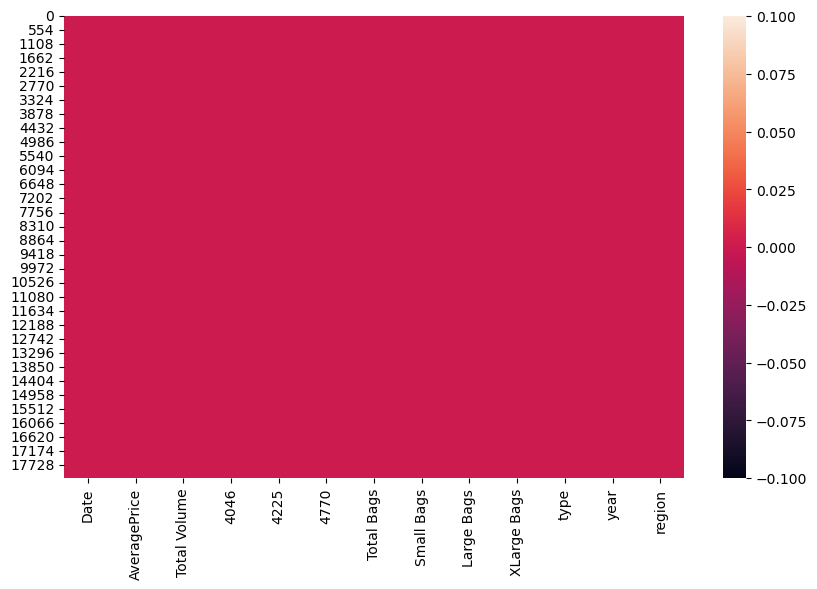

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

In [11]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

              Missing Values  % Missing data
Date                       0             0.0
AveragePrice               0             0.0
Total Volume               0             0.0
4046                       0             0.0
4225                       0             0.0
4770                       0             0.0
Total Bags                 0             0.0
Small Bags                 0             0.0
Large Bags                 0             0.0
XLarge Bags                0             0.0
type                       0             0.0
year                       0             0.0
region                     0             0.0


# Checking Data types

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


* There are 13 features in Data
* Region has object data types
* Date by default data type is object data which is need to be change to datatime datatypes
* Other veriable are float and int datatypes

In [13]:
# Converting datatype of date columns
df['Date']=pd.to_datetime(df.Date)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [15]:
numeric_df = df.select_dtypes(include=[np.number])

In [16]:
desc = numeric_df.describe()

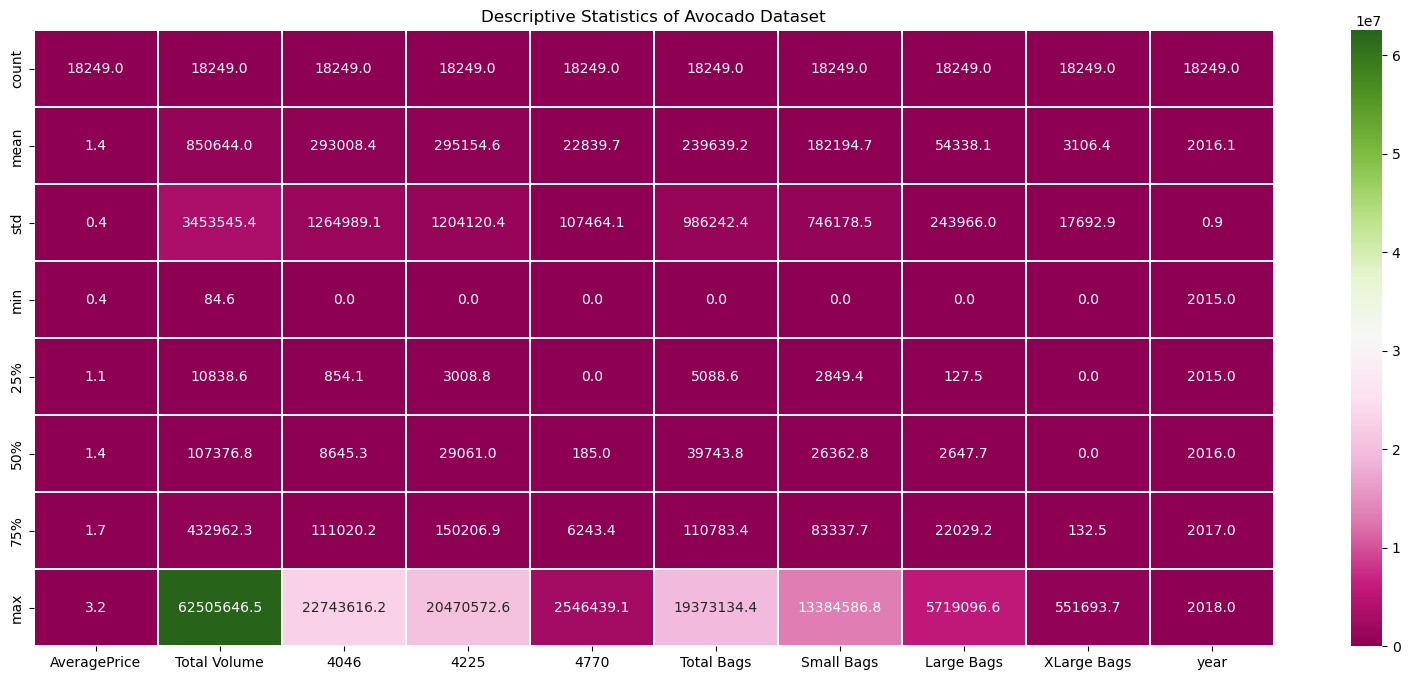

In [17]:
plt.figure(figsize=(20,8))
sns.heatmap(desc, linewidths=0.1, fmt='.1f', annot=True, cmap='PiYG')
plt.title('Descriptive Statistics of Avocado Dataset')
plt.show()

In [18]:
df.describe().T.round(3)

count                           mean                  min  \
Date            18249  2016-08-13 23:30:43.498273792  2015-01-04 00:00:00   
AveragePrice  18249.0                       1.405978                 0.44   
Total Volume  18249.0                  850644.013009                84.56   
4046          18249.0                  293008.424531                  0.0   
4225          18249.0                  295154.568356                  0.0   
4770          18249.0                   22839.735993                  0.0   
Total Bags    18249.0                   239639.20206                  0.0   
Small Bags    18249.0                  182194.686696                  0.0   
Large Bags    18249.0                   54338.088145                  0.0   
XLarge Bags   18249.0                    3106.426507                  0.0   
year          18249.0                    2016.147899               2015.0   

                              25%                  50%                  75%  \
Date          2015-10-25 00:00:00  2016-08-14 00:00:00  2017-06-04 00:00:00   
AveragePrice                  1.1                 1.37                 1.66   
Total Volume             10838.58            107376.76            432962.29   
4046                       854.07               8645.3             111020.2   
4225                      3008.78             29061.02            150206.86   
4770                          0.0               184.99              6243.42   
Total Bags                5088.64             39743.83            110783.37   
Small Bags                2849.42             26362.82             83337.67   
Large Bags                 127.47              2647.71             22029.25   
XLarge Bags                   0.0                  0.0                132.5   
year                       2015.0               2016.0               2017.0   

                              max             std  
Date          2018-03-25 00:00:00             NaN  
AveragePrice                 3.25        0.402677  
Total Volume          62505646.52  3453545.355399  
4046                  22743616.17  1264989.081763  
4225                  20470572.61  1204120.401135  
4770                   2546439.11   107464.068435  
Total Bags            19373134.37   986242.399216  
Small Bags             13384586.8   746178.514962  
Large Bags             5719096.61   243965.964547  
XLarge Bags             551693.65    17692.894652  
year                       2018.0        0.939938

* We can easily check that some of the features contain outliers after looking at 50% and max columns.
* For most of columns have minimum value of zero.
* Almost in all columns value of mean is greater than median. Data is right skewed.
* For most of columns value of std. deviation is greater than mean i.e. data is spread.

### Start with find Average price of avocodo over the timeframe and according types

In [19]:
print("\033[1m"+'Minimum Price of Avocado :'+"\033[0m",df.AveragePrice.min(),'USD')
print("\033[1m"+'Maximum Price of avacado :'+"\033[0m",df.AveragePrice.max(),'USD')
print("\033[1m"+'Average Price of avacado :'+"\033[0m",df.AveragePrice.mean(),'USD')

Minimum Price of Avocado : 0.44 USD
Maximum Price of avacado : 3.25 USD
Average Price of avacado : 1.405978409775878 USD


<Axes: title={'center': 'Distribution Price'}, xlabel='AveragePrice', ylabel='Density'>

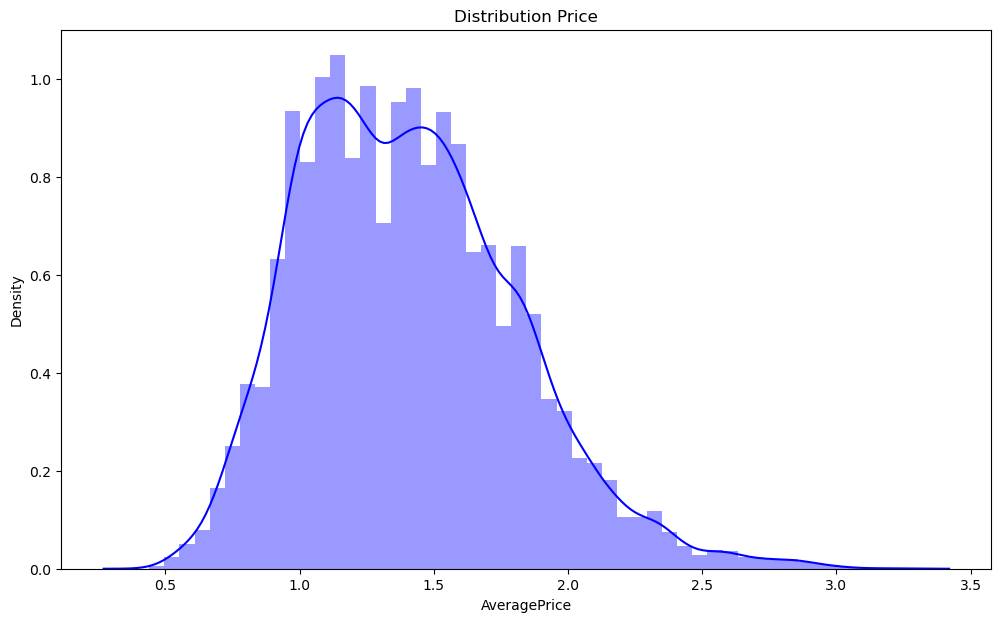

In [20]:
plt.figure(figsize=(12,7))
plt.title('Distribution Price')
sns.distplot(df["AveragePrice"], color='b')

Most of cases Average price of Avacado varies between 1.1 and 1.6 USD/unit

In [21]:
df['type'].value_counts()

type
conventional    9126
organic         9123
Name: count, dtype: int64

In [22]:
df.groupby('type')['AveragePrice'].mean()

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

In [23]:
print("\033[1m"+'Percentage difference in price of avacado :'+"\033[0m",((1.65399-1.1580)/1.1580)*100,"%")

Percentage difference in price of avacado : 42.831606217616596 %


<Axes: xlabel='AveragePrice', ylabel='type'>

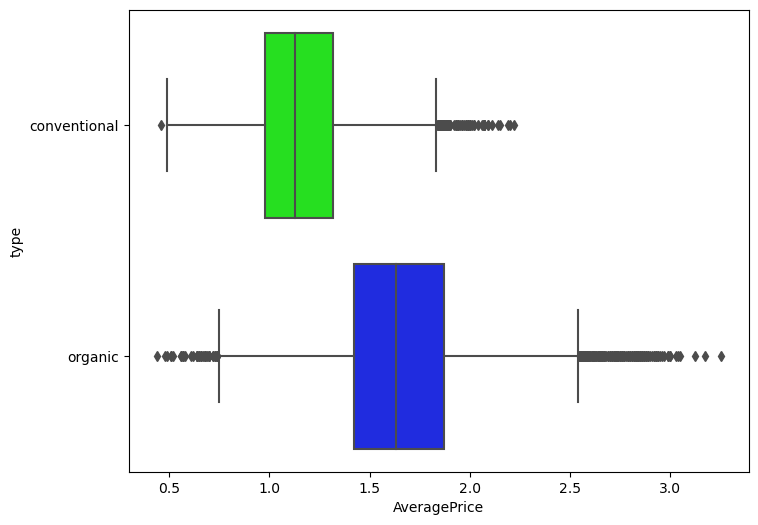

In [24]:
plt.figure(figsize=(8,6))
sns.boxplot(y="type", x="AveragePrice", data=df, palette = 'hsv')

* Oraganic Avocado is almost 43% more costlier than conventional Avacado.
* We can see that Average Price of Organic Avocado is higher than Conventional Avocado.
* This obvious as cultivation of organic avocado is expensive, time taking process demanding much effort & patience.Also health cautious and quality oriented people are willing to pay more price for it.

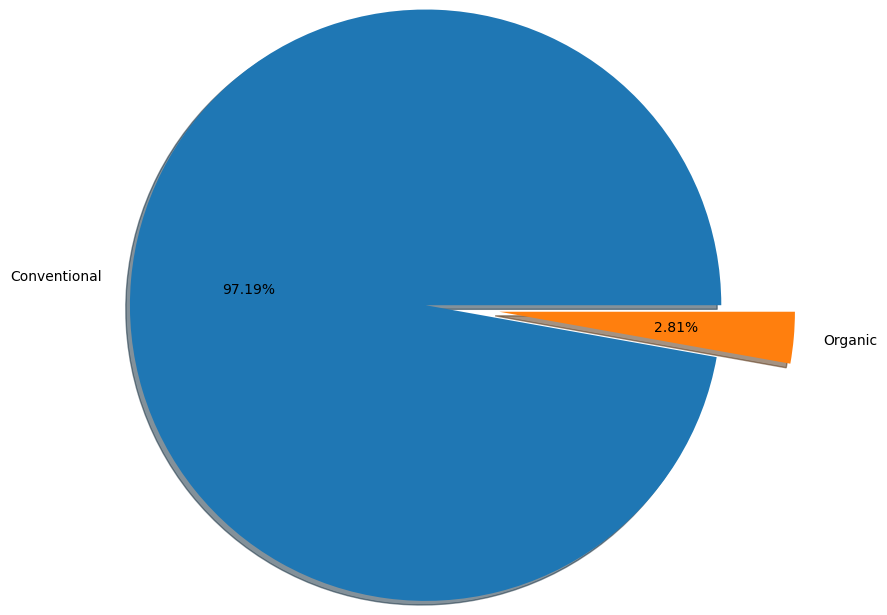

In [25]:
labels = 'Conventional','Organic',
fig, ax = plt.subplots()
ax.pie(df.groupby('type')['Total Volume'].mean(),labels = labels,radius =2,autopct = '%2.2f%%',explode=[0.3,0.2], shadow=True,)
plt.show()

In [26]:
df.groupby('type')['Total Volume'].mean()

type
conventional    1.653213e+06
organic         4.781121e+04
Name: Total Volume, dtype: float64

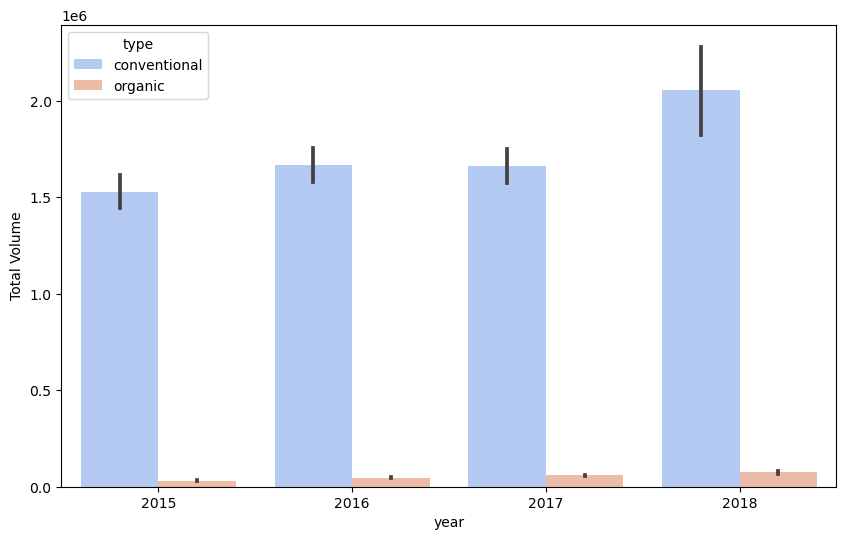

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(x='year', y='Total Volume', hue='type',data=df, palette='coolwarm',ci=68)
plt.show()

* Conventional Avacado are in more demand.
* The sell of organic avacodo is less than 3 %.
* Barplot confirm same thing in yearwise sales volume.

In [28]:
pd.crosstab([df.type,df.year],df.AveragePrice, margins= True).style.background_gradient(cmap='summer_r')

In [29]:
df.groupby(['year','type'])['AveragePrice'].agg([min,max,np.mean,np.median])

min   max      mean  median
year type                                      
2015 conventional  0.49  1.59  1.077963    1.08
     organic       0.81  2.79  1.673324    1.67
2016 conventional  0.51  2.20  1.105595    1.08
     organic       0.58  3.25  1.571684    1.53
2017 conventional  0.46  2.22  1.294888    1.30
     organic       0.44  3.17  1.735521    1.72
2018 conventional  0.56  1.74  1.127886    1.14
     organic       1.01  2.30  1.567176    1.55

* Oraganic Avocado is 40-50% costlier than conventional avacado.
* Avacodo got price hike in year 2017 as result of some reason may be inflation,shortage, more wages.
* Except 2017 each year their is incresase in price of avacado.

####  Lets check trend of demand through volume sell.

In [30]:
df.groupby(['year', 'type'])[['Total Volume', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']].sum()

Total Volume    Total Bags    Small Bags    Large Bags  \
year type                                                                   
2015 conventional  4.296599e+09  7.481009e+08  6.194886e+08  1.231692e+08   
     organic       8.886943e+07  2.409134e+07  1.519414e+07  8.897192e+06   
2016 conventional  4.690250e+09  1.398101e+09  1.064426e+09  3.136371e+08   
     organic       1.306401e+08  6.505765e+07  4.206845e+07  2.298920e+07   
2017 conventional  4.766166e+09  1.541193e+09  1.145835e+09  3.713655e+08   
     organic       1.681399e+08  1.050962e+08  7.711715e+07  2.797352e+07   
2018 conventional  1.334206e+09  4.593696e+08  3.344334e+08  1.177311e+08   
     organic       4.853227e+07  3.216630e+07  2.630799e+07  5.852903e+06   

                   XLarge Bags  
year type                       
2015 conventional   5443128.28  
     organic              0.00  
2016 conventional  20038284.84  
     organic              0.00  
2017 conventional  23991658.41  
     organic           5513.93  
2018 conventional   7205184.07  
     organic           5407.80

* Sales of Avacado in 2017 is more than 2016 so price hike is may be as result of increase in demand or some supply chain issue.
* sales in turn Demand is also increase over time.
* 30 % increase in sale of organic avocado in 2017 compare to 2016, even when it is almost 50% costlier than conventional type.
* XLarge Bags sales increase rapidly in 2017 compare to 2015.
* If we look at trend from 2015 customer start buying buying Large or Xlarge bags compare to small bags in case of Conventional type. May be quantity & discount offer by shop may be playing role here.
* There is also growth in demand of conventional type avocado year-wise but rate of growth of demand comparelative less than organic type. May be people becoming more health oriented.

In [31]:
df.sort_values(by=['Date'], inplace=True, ascending=True)

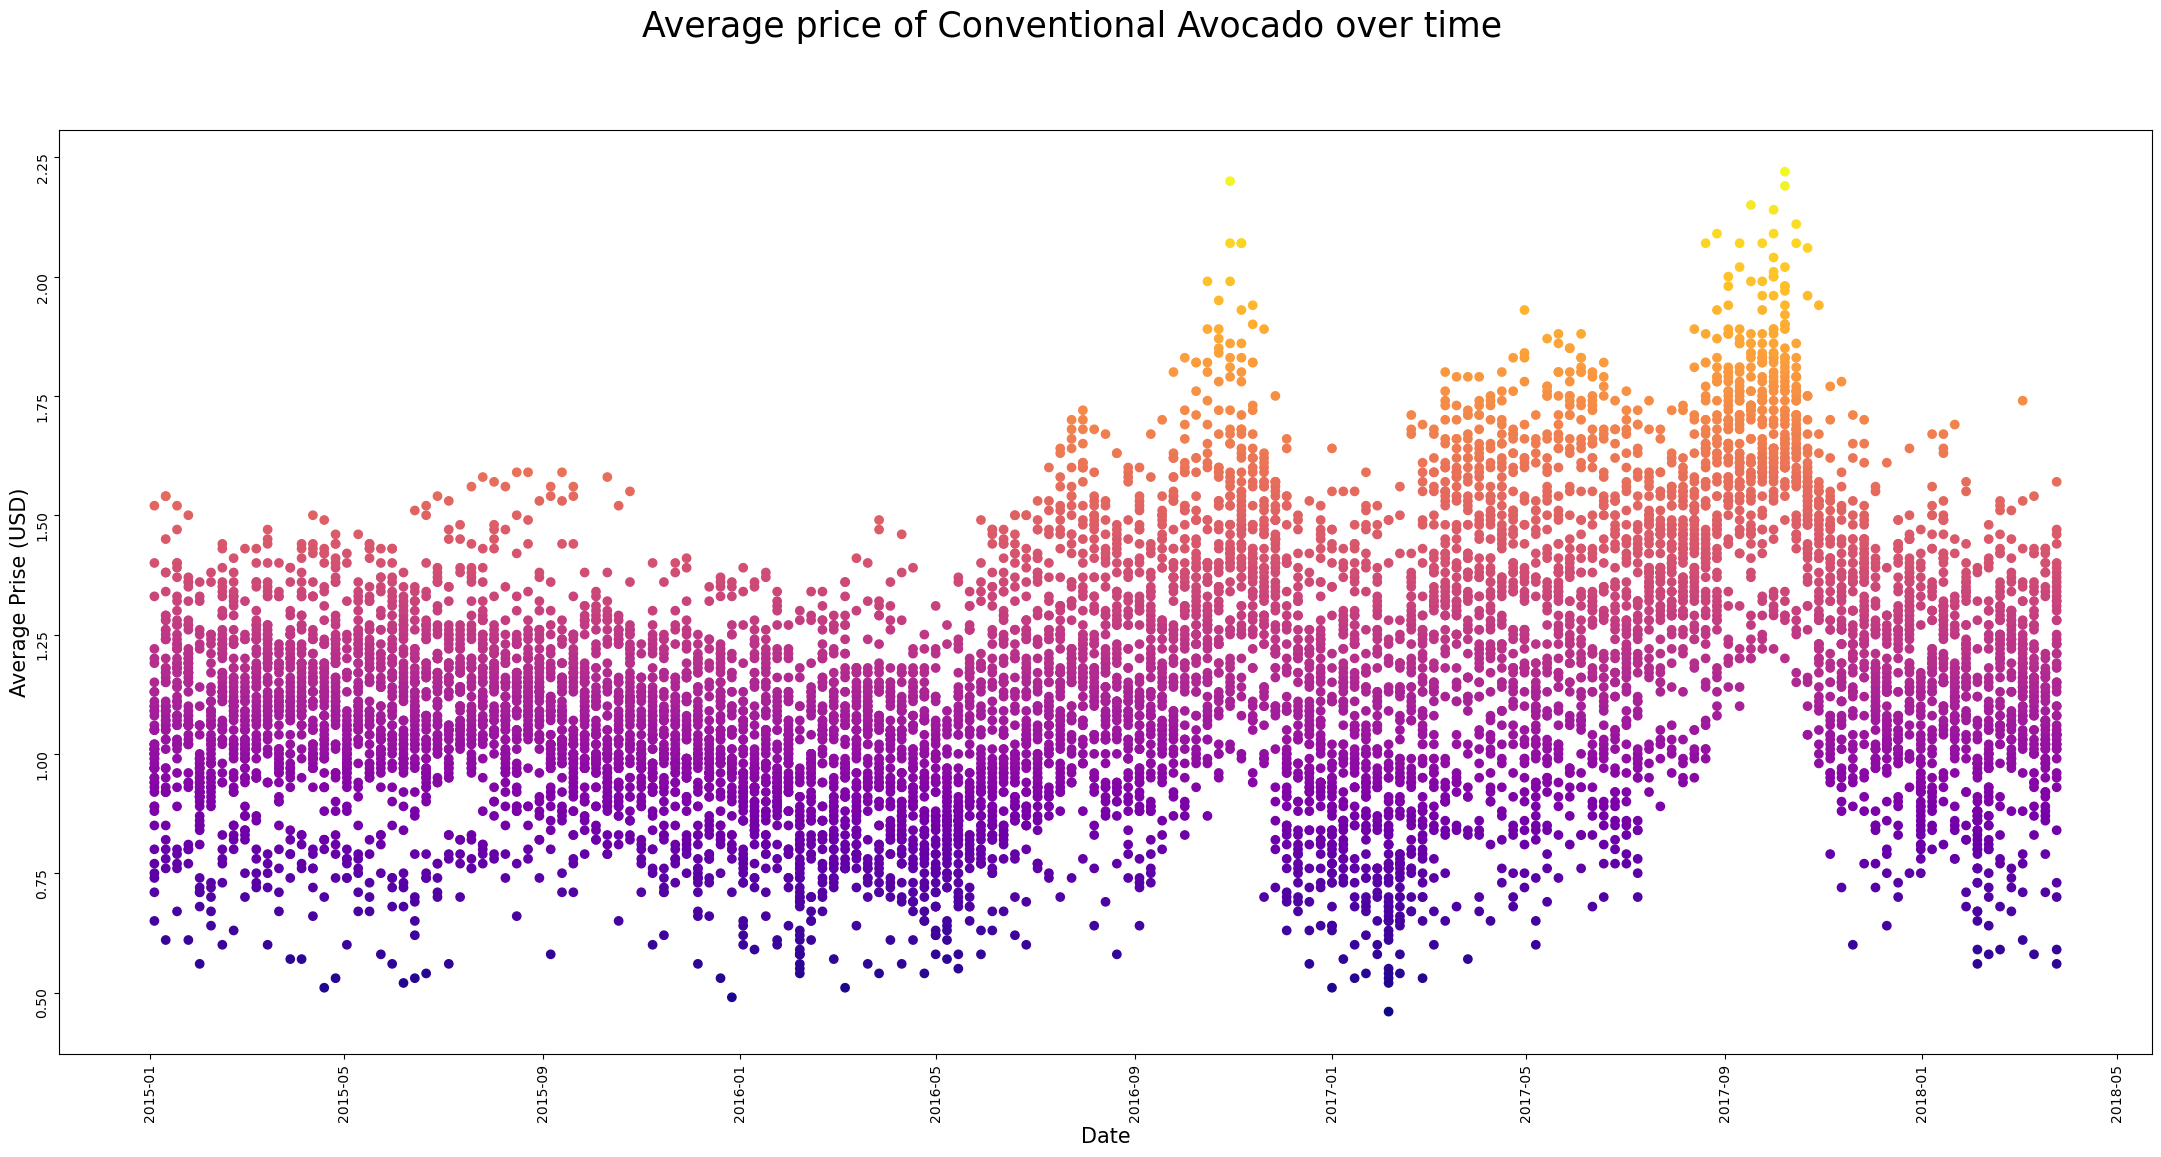

In [32]:
## Average price of Conventional Avocado over time 

mask = df['type']== 'conventional'
plt.rc('figure', titlesize=20)
fig = plt.figure(figsize = (27, 12))
fig.suptitle('Average price of Conventional Avocado over time', fontsize=25)
ax = fig.add_subplot(111)

dates = df[mask]['Date'].tolist()
avgPrices = df[mask]['AveragePrice'].tolist()

plt.scatter( dates, avgPrices, c=avgPrices, cmap='plasma')
ax.set_xlabel('Date',fontsize=15)
ax.set_ylabel('Average Prise (USD)', fontsize=15)
ax.set_xlim()
ax.tick_params(labelrotation=90)

plt.show()

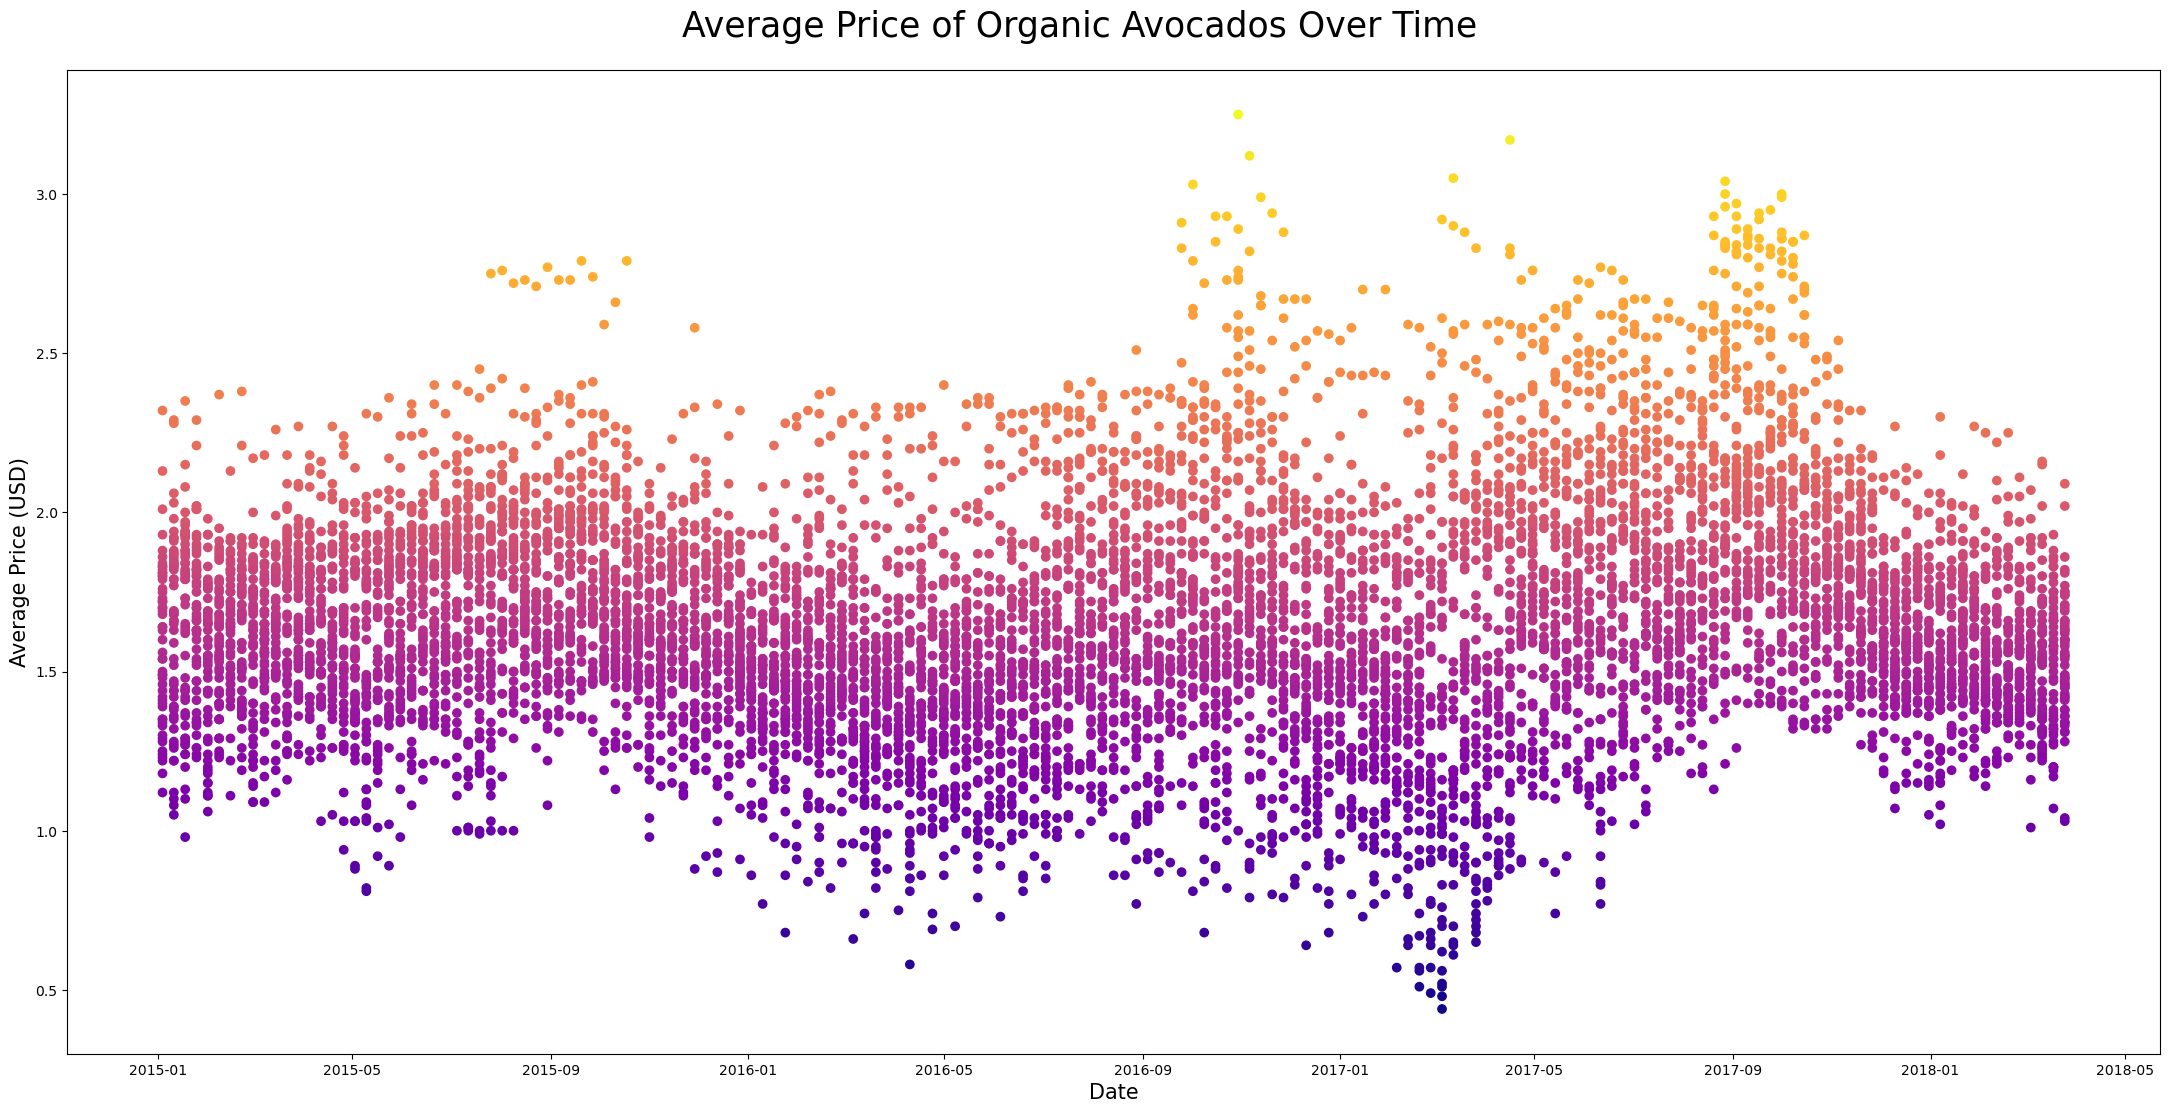

In [33]:
# Average price of Organic Avocados over time
mask = df['type']== 'organic'
plt.rc('figure', titlesize=20)
fig = plt.figure(figsize = (27, 12))
fig.suptitle('Average Price of Organic Avocados Over Time', fontsize=25)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.93)

dates = df[mask]['Date'].tolist()
avgPrices = df[mask]['AveragePrice'].tolist()

plt.scatter(dates,avgPrices, c=avgPrices, cmap='plasma')
ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
plt.xlim()
plt.show()

In [34]:
df.groupby(['region'])[['Total Volume', 'AveragePrice']].agg([sum])

Total Volume AveragePrice
                              sum          sum
region                                        
Albany               1.606780e+07       527.63
Atlanta              8.860512e+07       452.23
BaltimoreWashington  1.347139e+08       518.57
Boise                1.441319e+07       455.67
Boston               9.727398e+07       517.44
BuffaloRochester     2.296247e+07       512.69
California           1.028982e+09       471.62
Charlotte            3.555554e+07       542.84
Chicago              1.337023e+08       526.19
CincinnatiDayton     4.452201e+07       408.71
Columbus             2.999336e+07       423.44
DallasFtWorth        2.084193e+08       366.93
Denver               1.389025e+08       411.88
Detroit              6.342242e+07       431.32
GrandRapids          3.021174e+07       508.69
GreatLakes           5.896425e+08       452.43
HarrisburgScranton   4.180886e+07       511.49
HartfordSpringfield  5.067054e+07       614.70
Houston              2.031679e+08       354.20
Indianapolis         3.026339e+07       444.13
Jacksonville         2.879000e+07       510.70
LasVegas             5.437691e+07       466.75
LosAngeles           5.078965e+08       411.01
Louisville           1.609700e+07       434.90
MiamiFtLauderdale    9.767322e+07       482.83
Midsouth             5.083494e+08       474.81
Nashville            3.561209e+07       409.69
NewOrleansMobile     4.569514e+07       441.02
NewYork              2.407341e+08       583.92
Northeast            7.132809e+08       541.45
NorthernNewEngland   7.153289e+07       499.36
Orlando              5.866070e+07       509.10
Philadelphia         7.183880e+07       551.66
PhoenixTucson        1.956433e+08       413.86
Pittsburgh           1.880635e+07       461.14
Plains               3.111885e+08       485.54
Portland             1.105522e+08       445.39
RaleighGreensboro    4.820273e+07       525.63
RichmondNorfolk      4.223085e+07       436.47
Roanoke              2.504201e+07       421.80
Sacramento           7.516375e+07       548.09
SanDiego             8.979192e+07       472.58
SanFrancisco         1.358302e+08       609.82
Seattle              1.092142e+08       487.59
SouthCarolina        6.075377e+07       474.31
SouthCentral         1.011280e+09       372.22
Southeast            6.152384e+08       472.53
Spokane              1.556528e+07       488.61
StLouis              3.207283e+07       483.55
Syracuse             1.094267e+07       513.87
Tampa                6.600454e+07       476.19
TotalUS              5.864740e+09       445.83
West                 1.086779e+09       430.01
WestTexNewMexico     1.445218e+08       422.67

# Exploratory data analysis (EDA)

In [35]:
df.head()

Date  AveragePrice  Total Volume     4046      4225     4770  \
11569 2015-01-04          1.75      27365.89  9307.34   3844.81   615.28   
9593  2015-01-04          1.49      17723.17  1189.35  15628.27     0.00   
10009 2015-01-04          1.68       2896.72   161.68    206.96     0.00   
1819  2015-01-04          1.52      54956.80  3013.04  35456.88  1561.70   
9333  2015-01-04          1.64       1505.12     1.27   1129.50     0.00   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
11569    13598.46    13061.10      537.36          0.0       organic  2015   
9593       905.55      905.55        0.00          0.0       organic  2015   
10009     2528.08     2528.08        0.00          0.0       organic  2015   
1819     14925.18    11264.80     3660.38          0.0  conventional  2015   
9333       374.35      186.67      187.68          0.0       organic  2015   

                   region  
11569           Southeast  
9593              Chicago  
10009  HarrisburgScranton  
1819           Pittsburgh  
9333                Boise

In [36]:
df2 = df.copy()

In [37]:
# Creating DataFrame for numeric features
df2.drop(['Date','type','region','year'], axis=1, inplace=True)

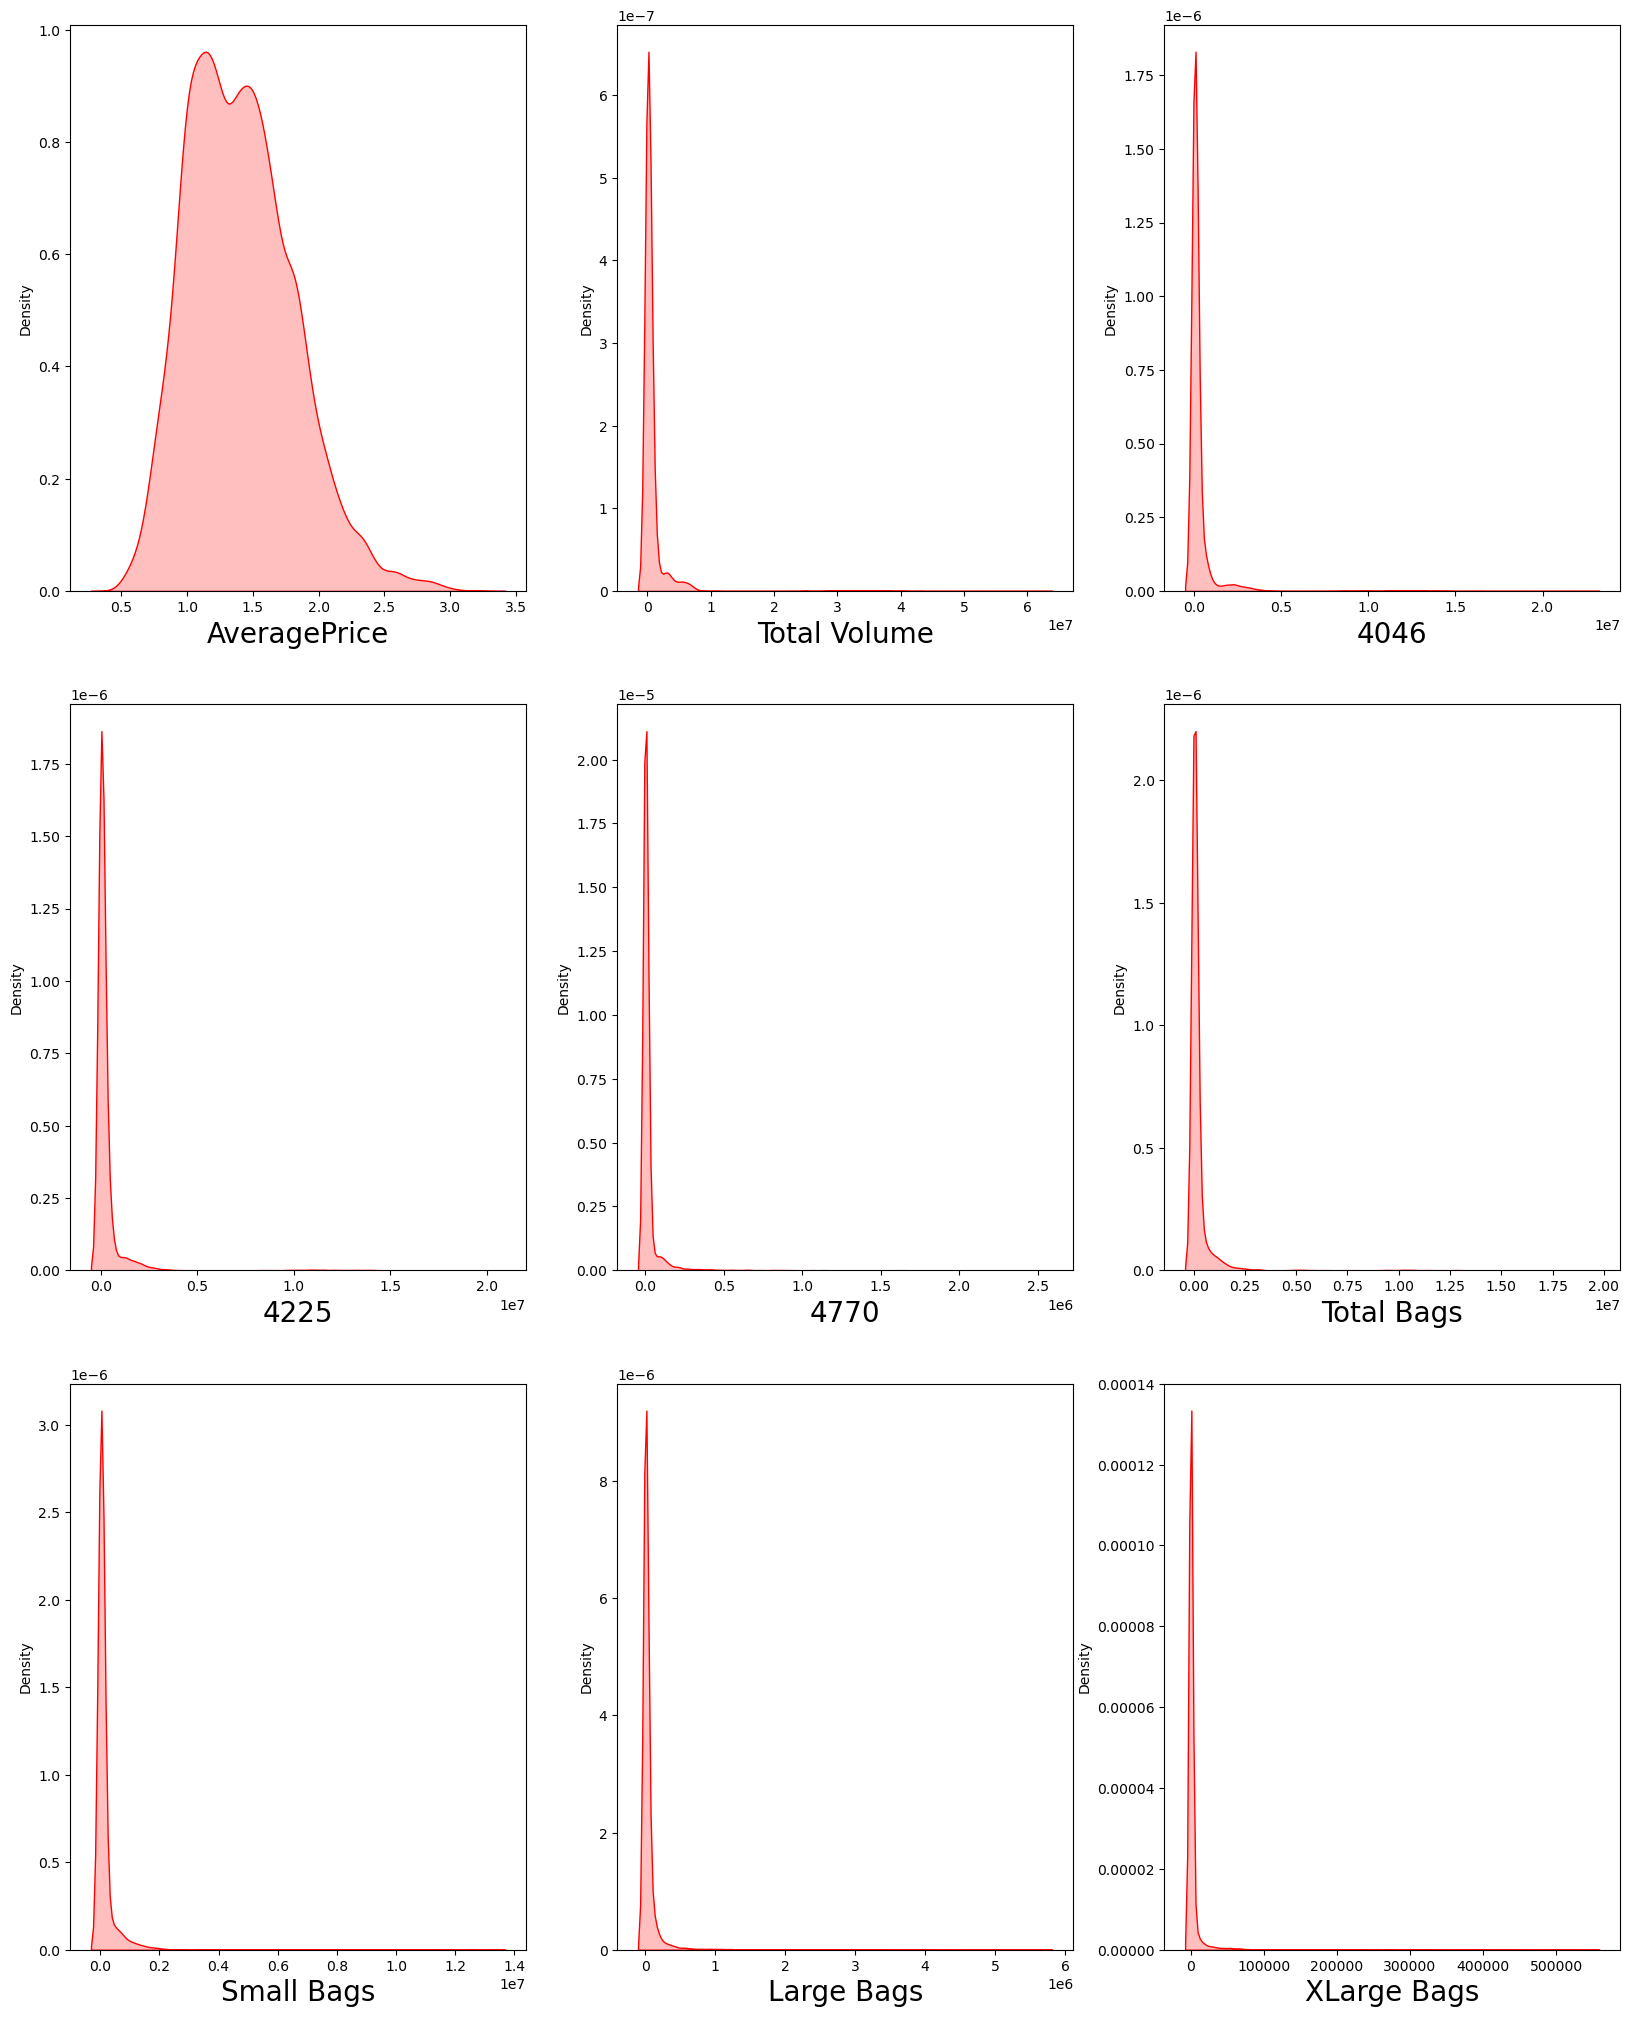

In [38]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in df2:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df2[column], color='r', hist=False, kde_kws={"shade": True})
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

* We can see skewed data with presence of outliers with sharp peak.
* Most of the plots are right skewed, having value of mean very small compare to std. deviation & median. This is resulting in sharp high peak.Very few data points are present as we move away from zero to other end of x-axis.

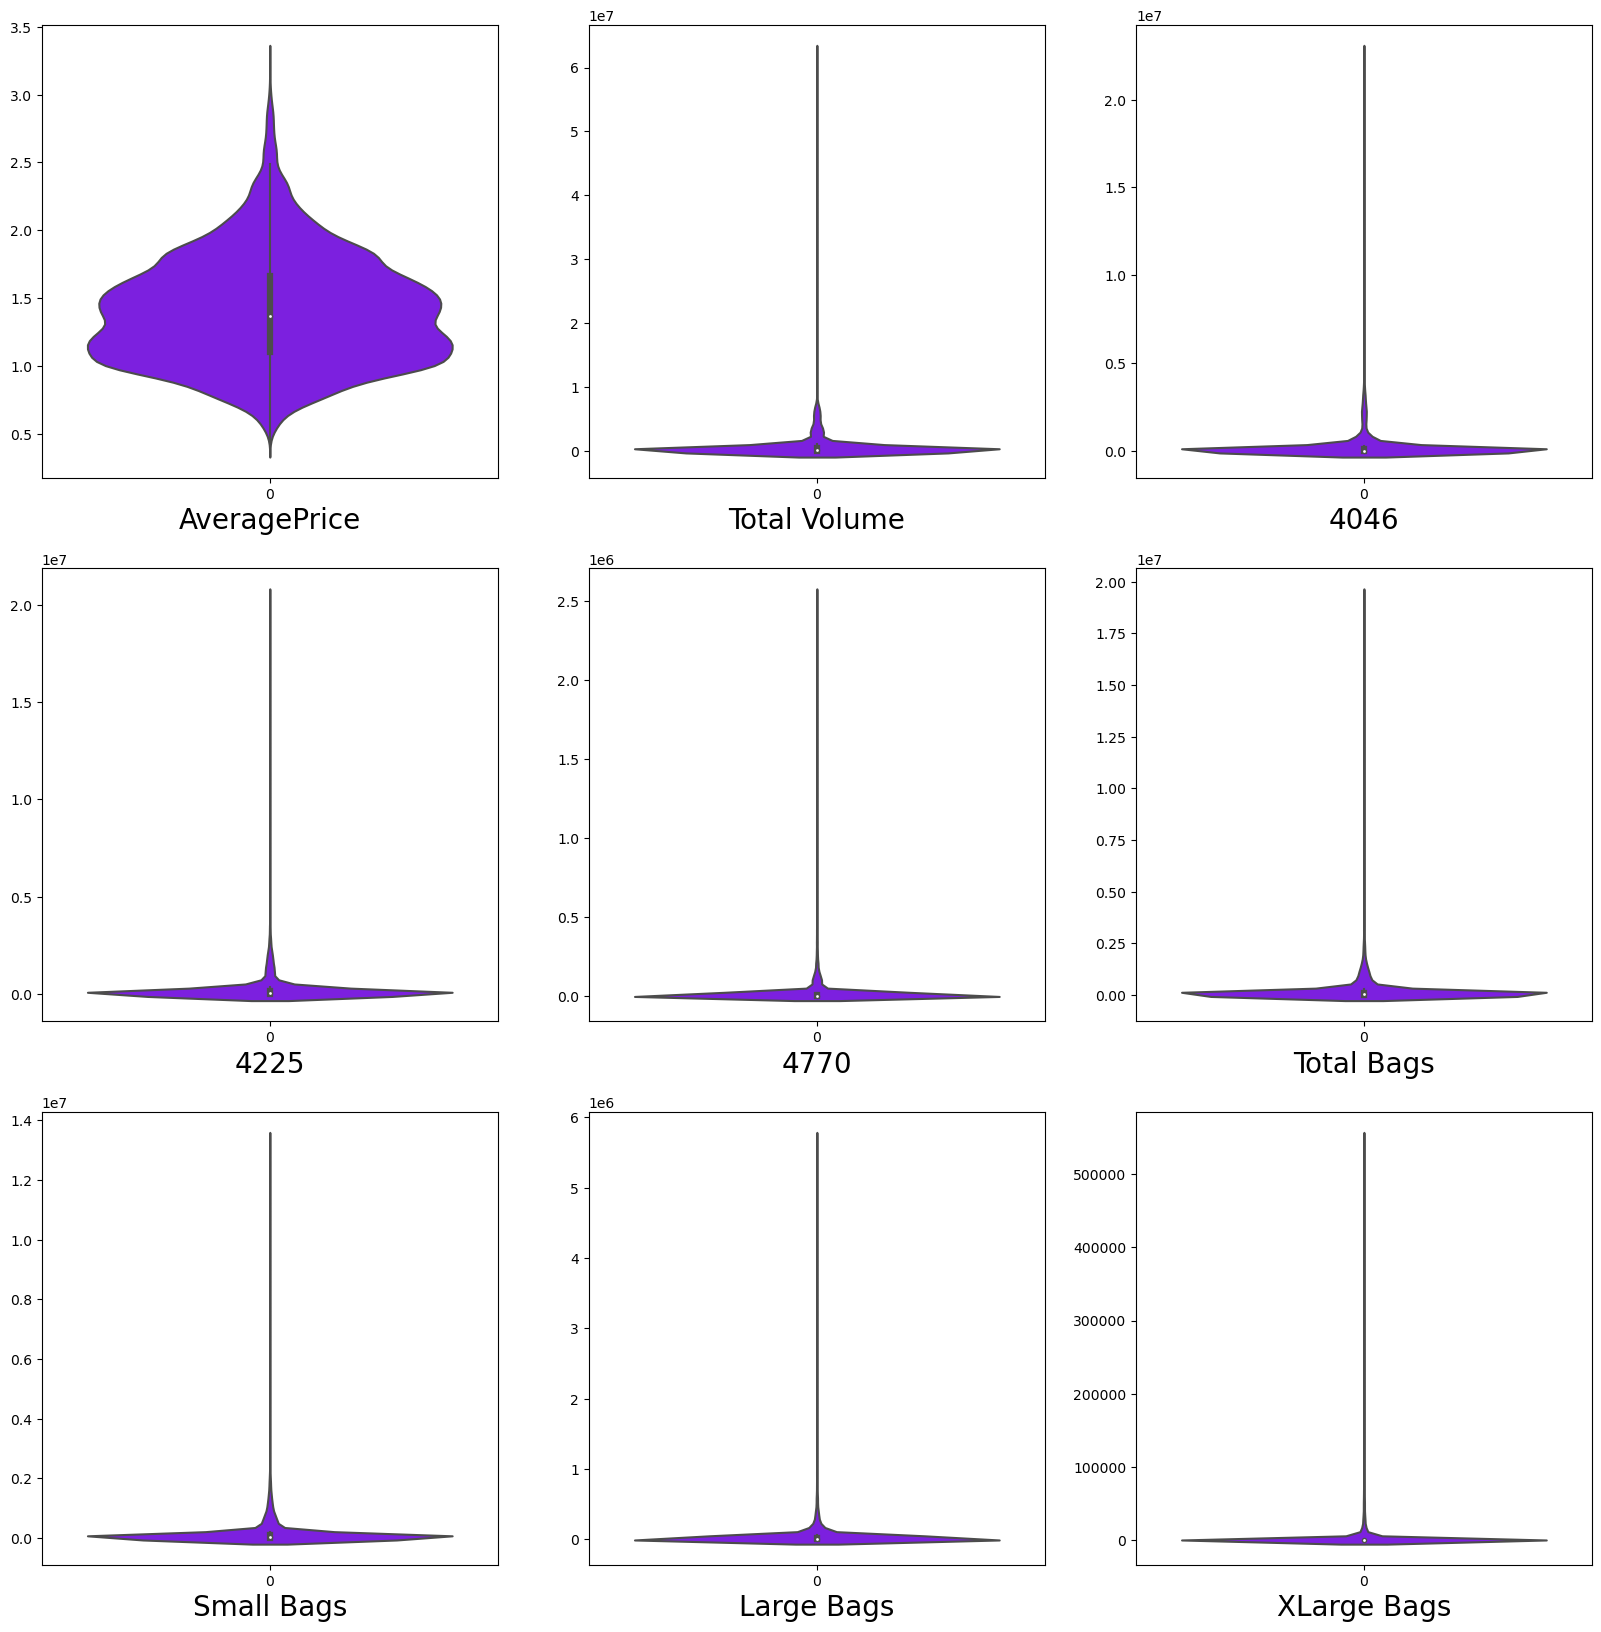

In [39]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,20), facecolor='white')
plotnumber = 1
for column in df2:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.violinplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

* For Majority Average price is in range of 1 to 1.5.
* Rest of Violin plot show same story as distribution plot.

#### Avacado availability and price also vary over the year according to seasonal changes.Lets check the variation Avg price and sales volume over each month.

For that purpose let create another copy dataframe and then split date column into Year,Month and Day.

In [40]:
# Copy of original dataframe
df3=df.copy()

In [41]:
df3['Date'] = df3['Date'].astype(str)
df3[['Year', 'Month', 'Day']] = df3['Date'].str.split('-', expand=True)
df3.drop(columns=['Date', 'year'], inplace=True)
df3.head()

AveragePrice  Total Volume     4046      4225     4770  Total Bags  \
11569          1.75      27365.89  9307.34   3844.81   615.28    13598.46   
9593           1.49      17723.17  1189.35  15628.27     0.00      905.55   
10009          1.68       2896.72   161.68    206.96     0.00     2528.08   
1819           1.52      54956.80  3013.04  35456.88  1561.70    14925.18   
9333           1.64       1505.12     1.27   1129.50     0.00      374.35   

       Small Bags  Large Bags  XLarge Bags          type              region  \
11569    13061.10      537.36          0.0       organic           Southeast   
9593       905.55        0.00          0.0       organic             Chicago   
10009     2528.08        0.00          0.0       organic  HarrisburgScranton   
1819     11264.80     3660.38          0.0  conventional          Pittsburgh   
9333       186.67      187.68          0.0       organic               Boise   

       Year Month Day  
11569  2015    01  04  
9593   2015    01  04  
10009  2015    01  04  
1819   2015    01  04  
9333   2015    01  04

In [42]:
# Converting Datetime datatypes to int
df3['Year']=df3['Year'].astype(int)
df3['Month']=df3['Month'].astype(int)
df3['Day']=df3['Day'].astype(int)

In [43]:
df3.drop(columns=['Day'], axis=1, inplace=True)

In [44]:
df3.head()

AveragePrice  Total Volume     4046      4225     4770  Total Bags  \
11569          1.75      27365.89  9307.34   3844.81   615.28    13598.46   
9593           1.49      17723.17  1189.35  15628.27     0.00      905.55   
10009          1.68       2896.72   161.68    206.96     0.00     2528.08   
1819           1.52      54956.80  3013.04  35456.88  1561.70    14925.18   
9333           1.64       1505.12     1.27   1129.50     0.00      374.35   

       Small Bags  Large Bags  XLarge Bags          type              region  \
11569    13061.10      537.36          0.0       organic           Southeast   
9593       905.55        0.00          0.0       organic             Chicago   
10009     2528.08        0.00          0.0       organic  HarrisburgScranton   
1819     11264.80     3660.38          0.0  conventional          Pittsburgh   
9333       186.67      187.68          0.0       organic               Boise   

       Year  Month  
11569  2015      1  
9593   2015      1  
10009  2015      1  
1819   2015      1  
9333   2015      1

In [45]:
# Checking unique values and Yearwise total No of sale entry
df3['Year'].value_counts()

Year
2017    5722
2016    5616
2015    5615
2018    1296
Name: count, dtype: int64

<Axes: xlabel='Year', ylabel='count'>

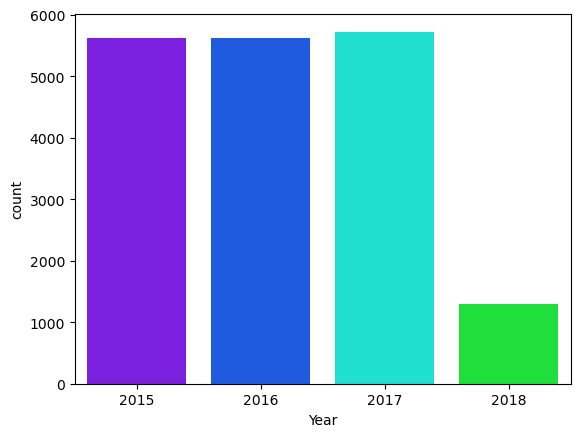

In [46]:
sns.countplot(x='Year',data=df3)

* This dataset contain data from 2015 to 2018
* Maximum sales entry belongs to year 2017 while very few sales entry comes from 2018.

# Checking Month-Wise sales entries

<Axes: xlabel='Month', ylabel='count'>

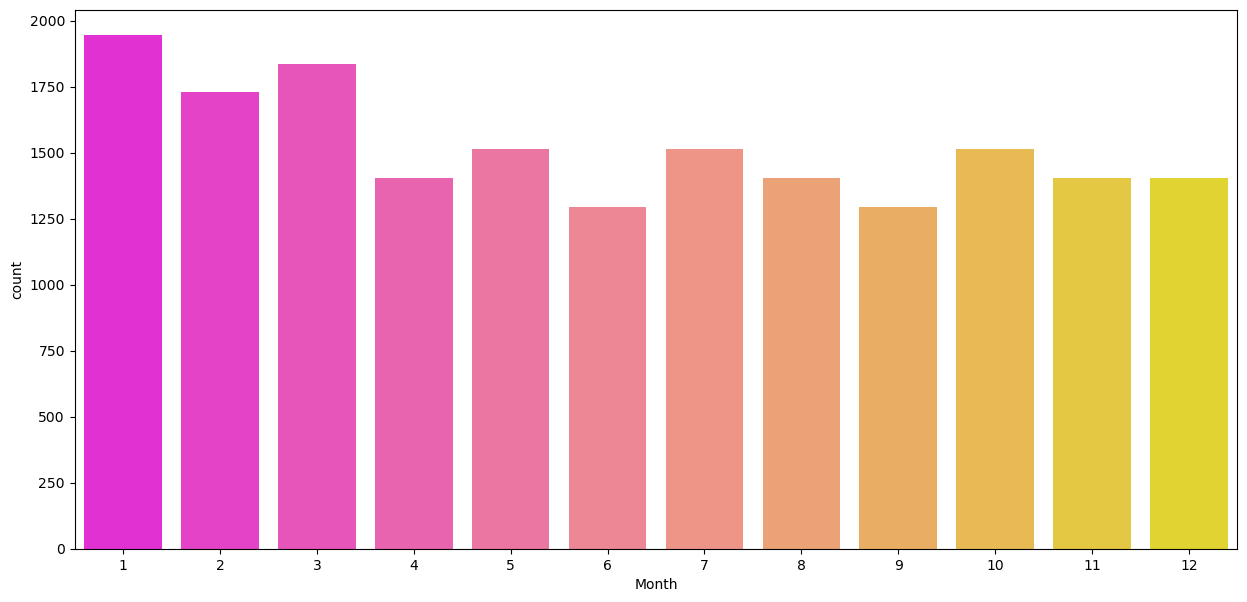

In [47]:
plt.figure(figsize=(15,7))
sns.countplot(x='Month', data=df3, palette="spring")

In [48]:
df3['Month'].value_counts().max()

1944

In [49]:
df3['Month'].value_counts().min()

1294

* Maximum sales lead comes in month of Jan, Feb, March
* Maximum sales demand of Avacodo is in month of Jan (1944 lead) & Minimum sales demand of Avacoda is in month of June(1294 lead).

# Checking Month wise variation in Average Price

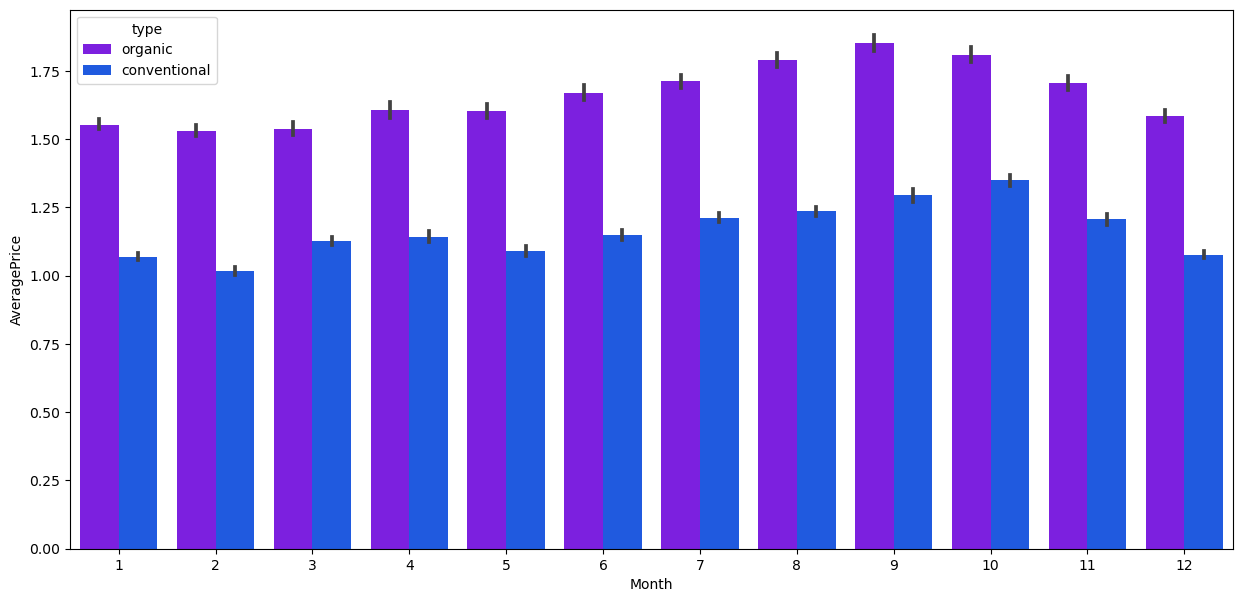

In [50]:
plt.figure(figsize=(15,7))
sns.barplot(x='Month', y='AveragePrice', hue='type', data=df3)
plt.show()

In [51]:
df3.groupby(['Month','type'])['AveragePrice'].agg([np.mean]).T

Month           1                      2                      3             \
type  conventional   organic conventional   organic conventional   organic   
mean      1.069095  1.552942     1.017315  1.531458     1.126209  1.538301   

Month           4                     5             ...           8            \
type  conventional  organic conventional   organic  ... conventional  organic   
mean       1.14235  1.60641     1.089577  1.603624  ...     1.235399  1.78963   

Month           9                      10                     11            \
type  conventional   organic conventional   organic conventional   organic   
mean      1.294738  1.850571     1.349339  1.810026     1.206054  1.705071   

Month           12            
type  conventional   organic  
mean      1.077393  1.585193  

[1 rows x 24 columns]

<Figure size 1000x1000 with 0 Axes>

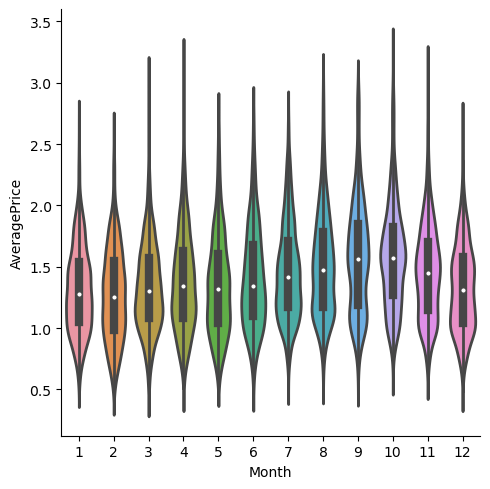

In [52]:
plt.figure(figsize=(10,10))
sns.catplot(x="Month", y="AveragePrice", kind ='violin', data=df3, linewidth=2)
plt.show()

* In month of September and October Price of Conventional type of Avacado is comparatively higher than other months.
* We can see that variation in mean price values in above groupby table, which confirm what we got from barplot.

# Now we have not explore region feature , Now is time do it.

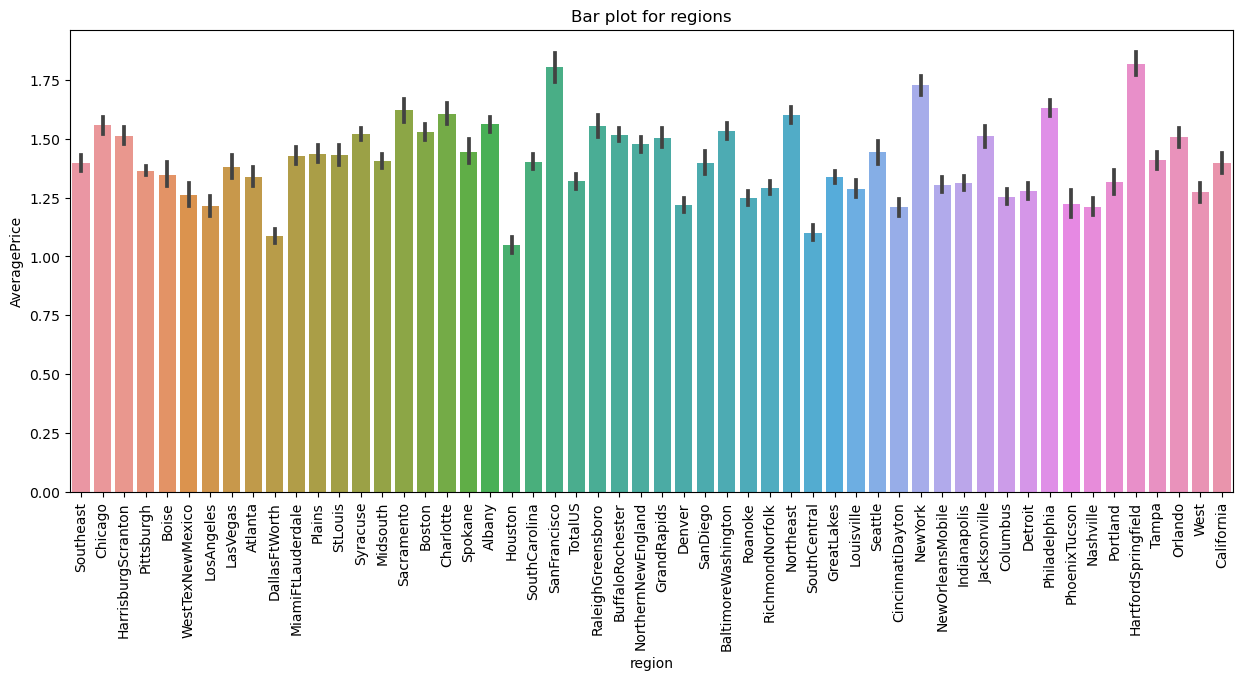

In [53]:
plt.figure(figsize=(15,6))
sns.barplot(x=df['region'], y=df['AveragePrice'], data=df3)
plt.title(f'Bar plot for regions')
plt.xticks(rotation=90)
plt.show()

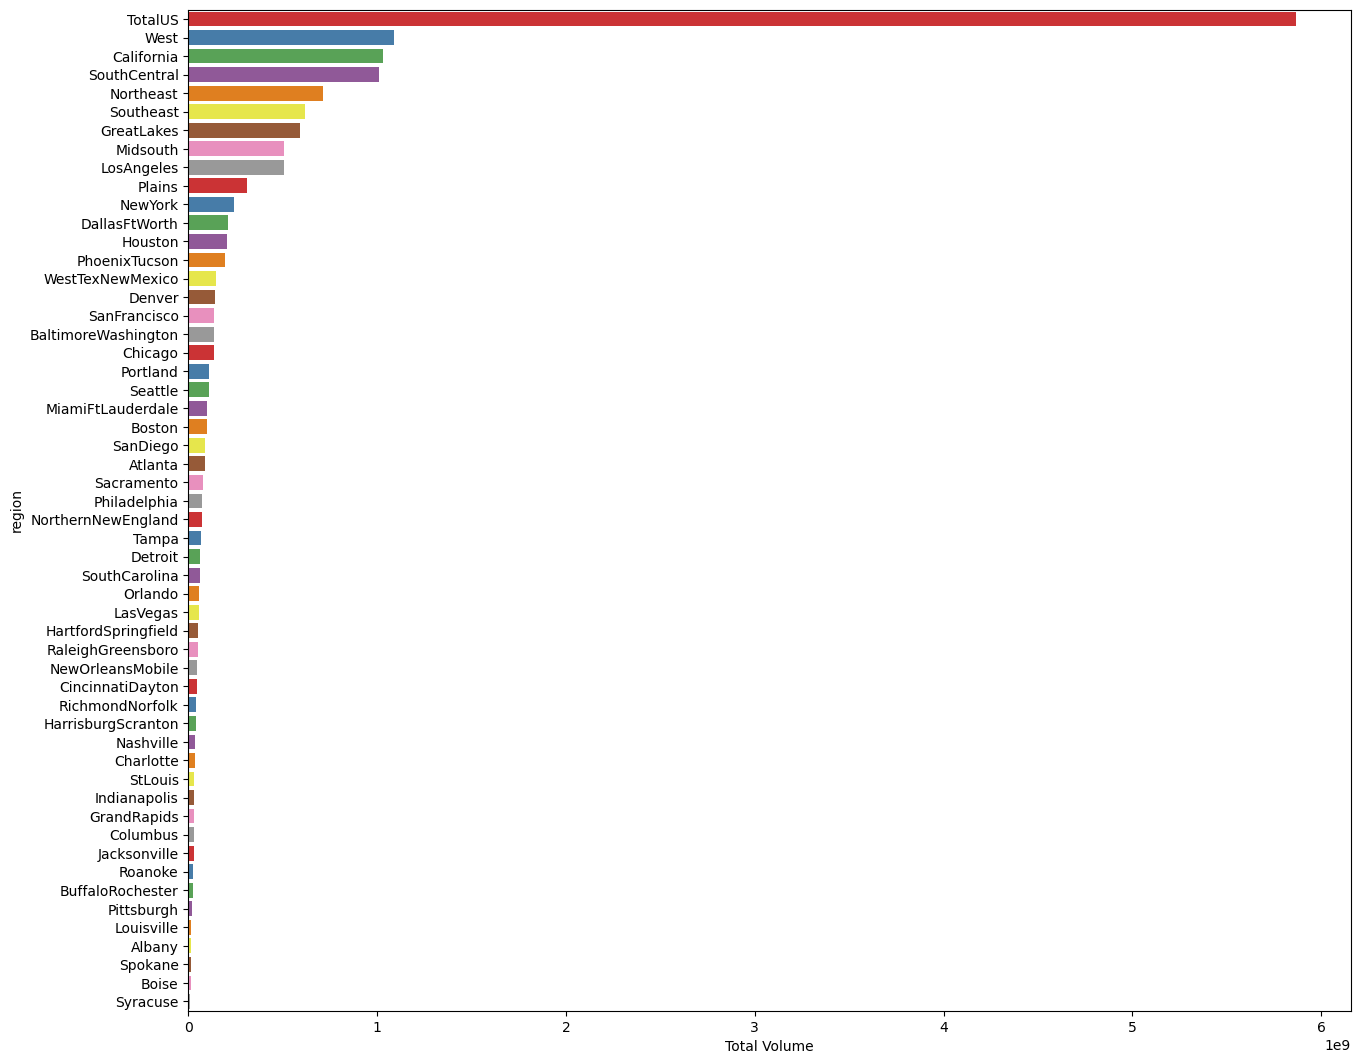

In [54]:
region = df.groupby('region')['Total Volume'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,13))
sns.barplot(x=region["Total Volume"], y=region["region"], data=df, palette="Set1")
plt.show()

In [55]:
df.groupby('region')[['Total Volume', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']].agg(np.mean)

Total Volume    Total Bags    Small Bags    Large Bags  \
region                                                                        
Albany               4.753787e+04  7.929747e+03  6.647765e+03  1.153496e+03   
Atlanta              2.621453e+05  8.449856e+04  5.160573e+04  3.207004e+04   
BaltimoreWashington  3.985619e+05  1.044561e+05  1.009397e+05  2.903985e+03   
Boise                4.264257e+04  1.597459e+04  1.384004e+04  2.103634e+03   
Boston               2.877929e+05  6.359609e+04  5.890659e+04  4.438365e+03   
BuffaloRochester     6.793630e+04  3.435134e+04  3.037998e+04  3.729050e+03   
California           3.044324e+06  7.298290e+05  6.778038e+05  3.642585e+04   
Charlotte            1.051939e+05  3.460930e+04  3.149069e+04  2.912684e+03   
Chicago              3.955690e+05  4.989763e+04  4.377116e+04  5.005547e+03   
CincinnatiDayton     1.317219e+05  6.182816e+04  1.675117e+04  4.429643e+04   
Columbus             8.873776e+04  2.963428e+04  2.387808e+04  5.103195e+03   
DallasFtWorth        6.166251e+05  1.374845e+05  1.207744e+05  1.543113e+04   
Denver               4.109542e+05  1.744290e+05  5.551362e+04  1.187601e+05   
Detroit              1.876403e+05  7.177534e+04  5.899134e+04  7.905232e+03   
GrandRapids          8.938383e+04  2.712750e+04  2.228839e+04  2.357398e+03   
GreatLakes           1.744505e+06  5.283303e+05  3.647559e+05  1.446617e+05   
HarrisburgScranton   1.236948e+05  4.002738e+04  3.778956e+04  1.780372e+03   
HartfordSpringfield  1.499128e+05  3.352962e+04  3.188923e+04  1.410794e+03   
Houston              6.010884e+05  1.485653e+05  9.622831e+04  5.137208e+04   
Indianapolis         8.953666e+04  3.544618e+04  1.955936e+04  1.504810e+04   
Jacksonville         8.517753e+04  2.875186e+04  1.283961e+04  1.560060e+04   
LasVegas             1.608784e+05  5.341122e+04  2.656102e+04  2.680271e+04   
LosAngeles           1.502653e+06  4.978240e+05  4.607281e+05  2.503889e+04   
Louisville           4.762427e+04  1.963103e+04  8.326157e+03  1.098558e+04   
MiamiFtLauderdale    2.889740e+05  6.957527e+04  3.319519e+04  3.547577e+04   
Midsouth             1.503992e+06  4.630581e+05  3.975279e+05  6.145227e+04   
Nashville            1.053612e+05  3.836440e+04  2.971239e+04  8.322173e+03   
NewOrleansMobile     1.351927e+05  4.221580e+04  3.508744e+04  5.611536e+03   
NewYork              7.122311e+05  2.011661e+05  1.727860e+05  2.731656e+04   
Northeast            2.110299e+06  5.828059e+05  5.136774e+05  6.525460e+04   
NorthernNewEngland   2.116358e+05  4.113913e+04  3.336382e+04  7.447946e+03   
Orlando              1.735524e+05  4.988651e+04  2.641384e+04  2.275300e+04   
Philadelphia         2.125408e+05  7.063678e+04  6.336398e+04  6.958744e+03   
PhoenixTucson        5.788264e+05  1.151131e+05  6.589535e+04  4.875947e+04   
Pittsburgh           5.564008e+04  2.143628e+04  1.600053e+04  5.265377e+03   
Plains               9.206761e+05  2.303172e+05  2.034338e+05  2.359066e+04   
Portland             3.270775e+05  1.464626e+05  1.228066e+05  2.342522e+04   
RaleighGreensboro    1.426116e+05  4.638070e+04  4.449847e+04  1.601024e+03   
RichmondNorfolk      1.249433e+05  3.700659e+04  3.448670e+04  2.153671e+03   
Roanoke              7.408879e+04  2.837570e+04  2.501876e+04  3.121787e+03   
Sacramento           2.223779e+05  2.657476e+04  2.573030e+04  2.269676e+02   
SanDiego             2.656566e+05  6.906115e+04  5.998754e+04  8.644449e+03   
SanFrancisco         4.018645e+05  4.405599e+04  4.290636e+04  5.234889e+02   
Seattle              3.231189e+05  1.499746e+05  1.255833e+05  2.418919e+04   
SouthCarolina        1.797449e+05  5.370761e+04  3.968446e+04  1.335283e+04   
SouthCentral         2.991952e+06  6.905102e+05  5.467914e+05  1.359078e+05   
Southeast            1.820232e+06  5.370640e+05  3.162819e+05  2.133361e+05   
Spokane              4.605111e+04  1.850407e+04  1.588258e+04  2.600242e+03   
StLouis              9.489004e+04  4.359772e+04  3.530135e+04  7.631293

* Maximum sales Volume is in South Central While Minimum Sales Volume is in Syracuse.
* Maximum Average Price is in SanFrancisco and Minimum Average Sale price is in Houston.

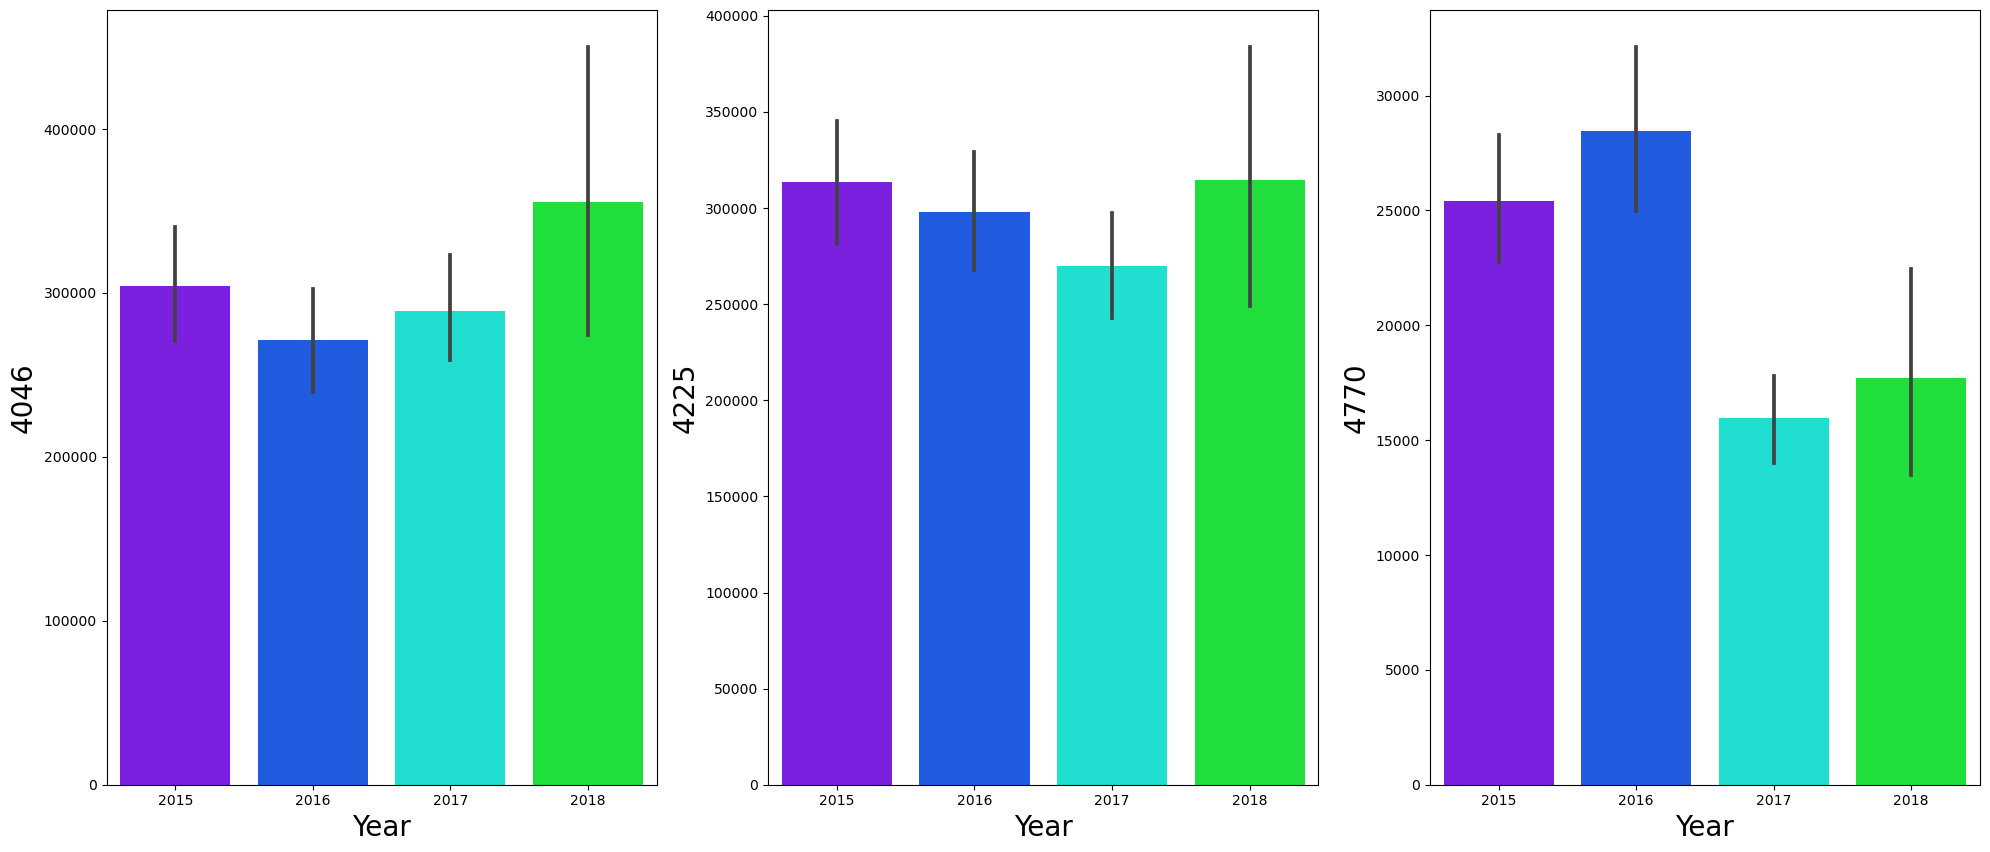

In [56]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
y = df[['4046', '4225', '4770']]
X = df['year']
for col in y.columns:
    plt.subplot(3, 3, plotnumber)
    sns.barplot(x=X, y=y[col])
    plt.xlabel('Year', fontsize=20)
    plt.ylabel(col, fontsize=20)
    plotnumber += 1
plt.tight_layout()
plt.show()

* Production of PLU 4046 has grown over the 4 years and is greater than the production of PLU 4225 and PLU 4770, which is least produced.

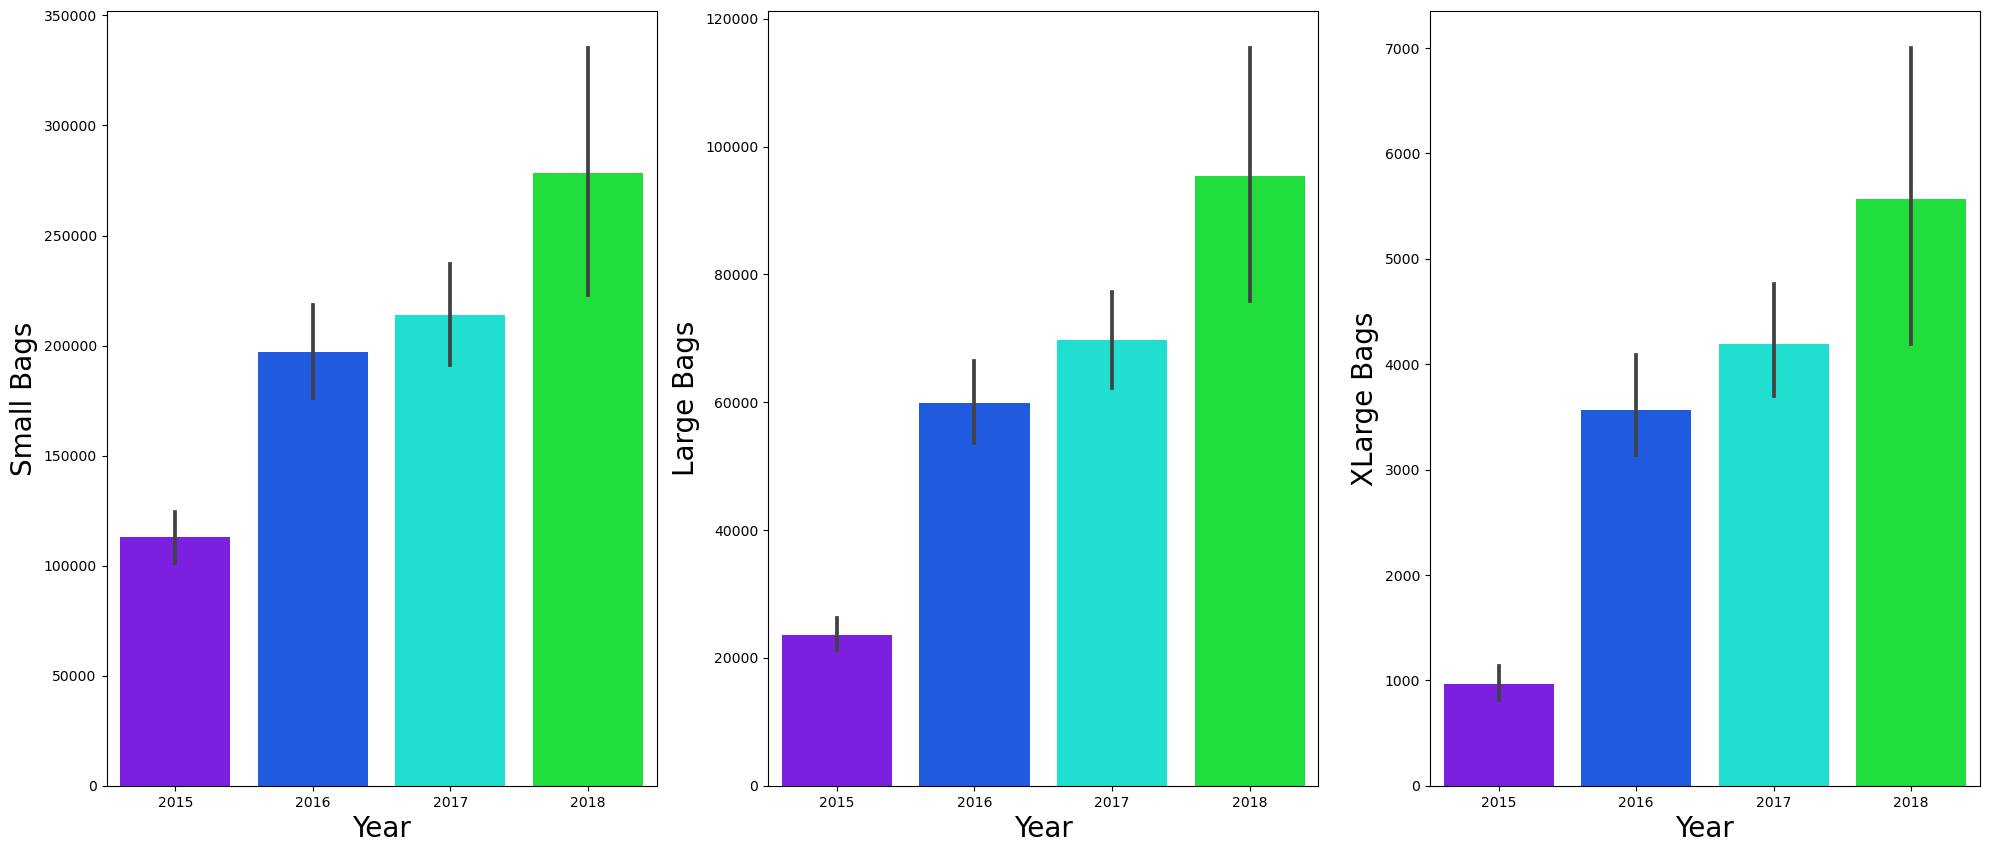

In [57]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
y = df[['Small Bags', 'Large Bags', 'XLarge Bags']]
X = df['year']
for col in y.columns:
    plt.subplot(3, 3, plotnumber)
    sns.barplot(x=X, y=y[col])
    plt.xlabel('Year', fontsize=20)
    plt.ylabel(col, fontsize=20)
    plotnumber += 1
plt.tight_layout()
plt.show()

* Sale of all 3 types of bags has grown over the years.
* Most of customers prefer buying Small Bags over Large and Xlarge bags.
* There is very narrow Customer segment willing to buy XLarge type bags possiblily more quantity need to consume and price associated with it.

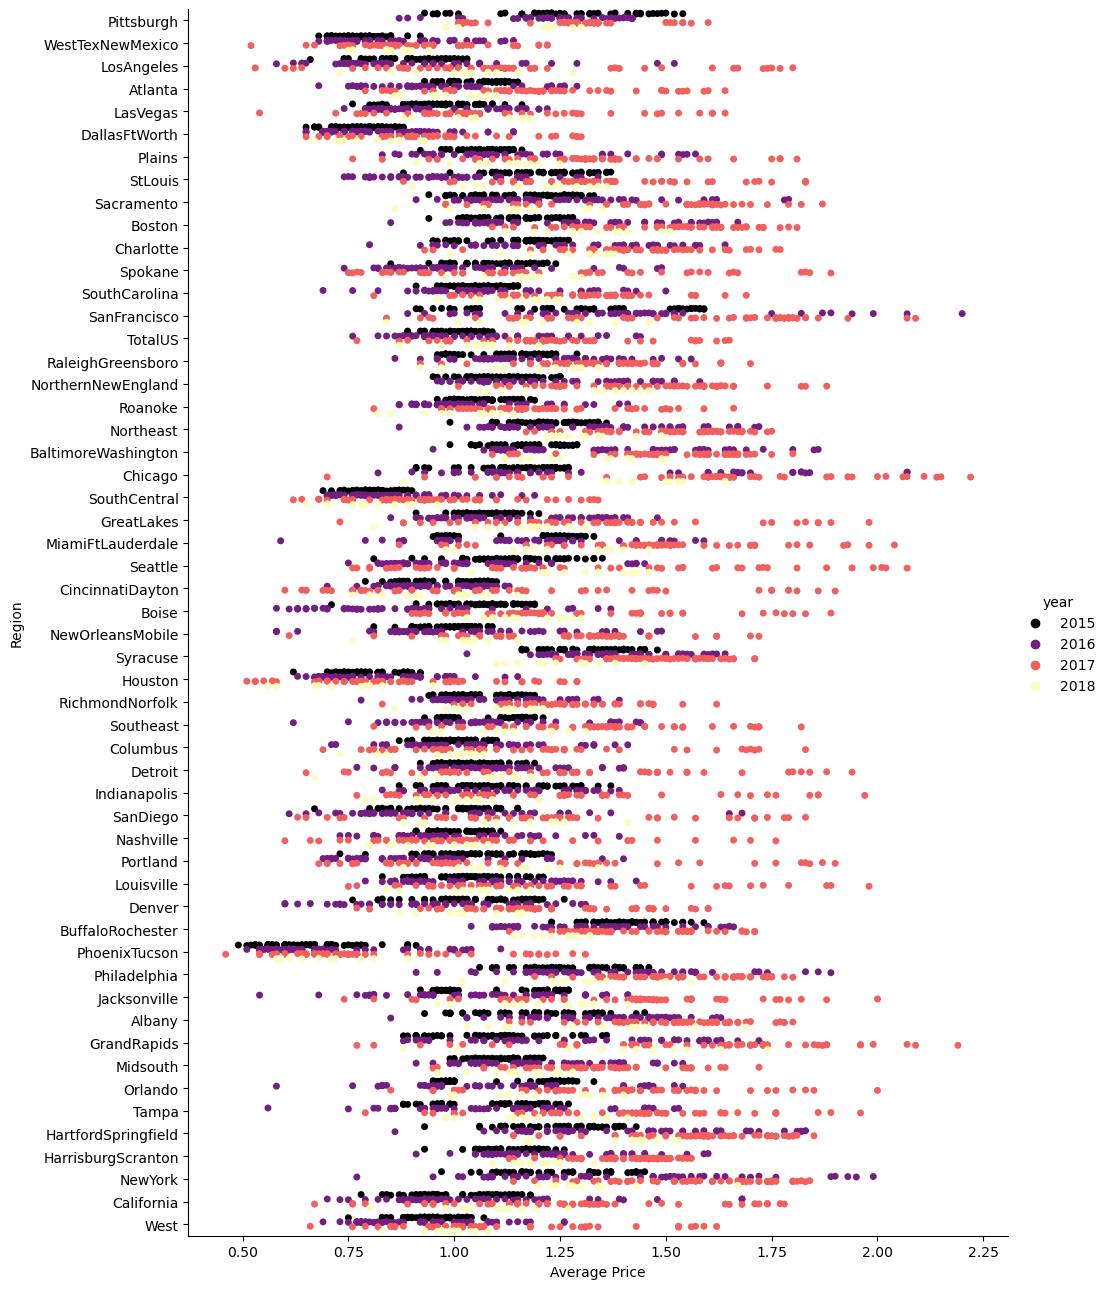

In [58]:
mask = df['type'] == 'conventional'
g = sns.catplot(x='AveragePrice', y='region', data=df[mask],
                hue='year',
                height=13,  
                aspect=0.8,
                palette='magma',
                kind='strip',  
                dodge=True)
g.set_axis_labels("Average Price", "Region")
plt.show()

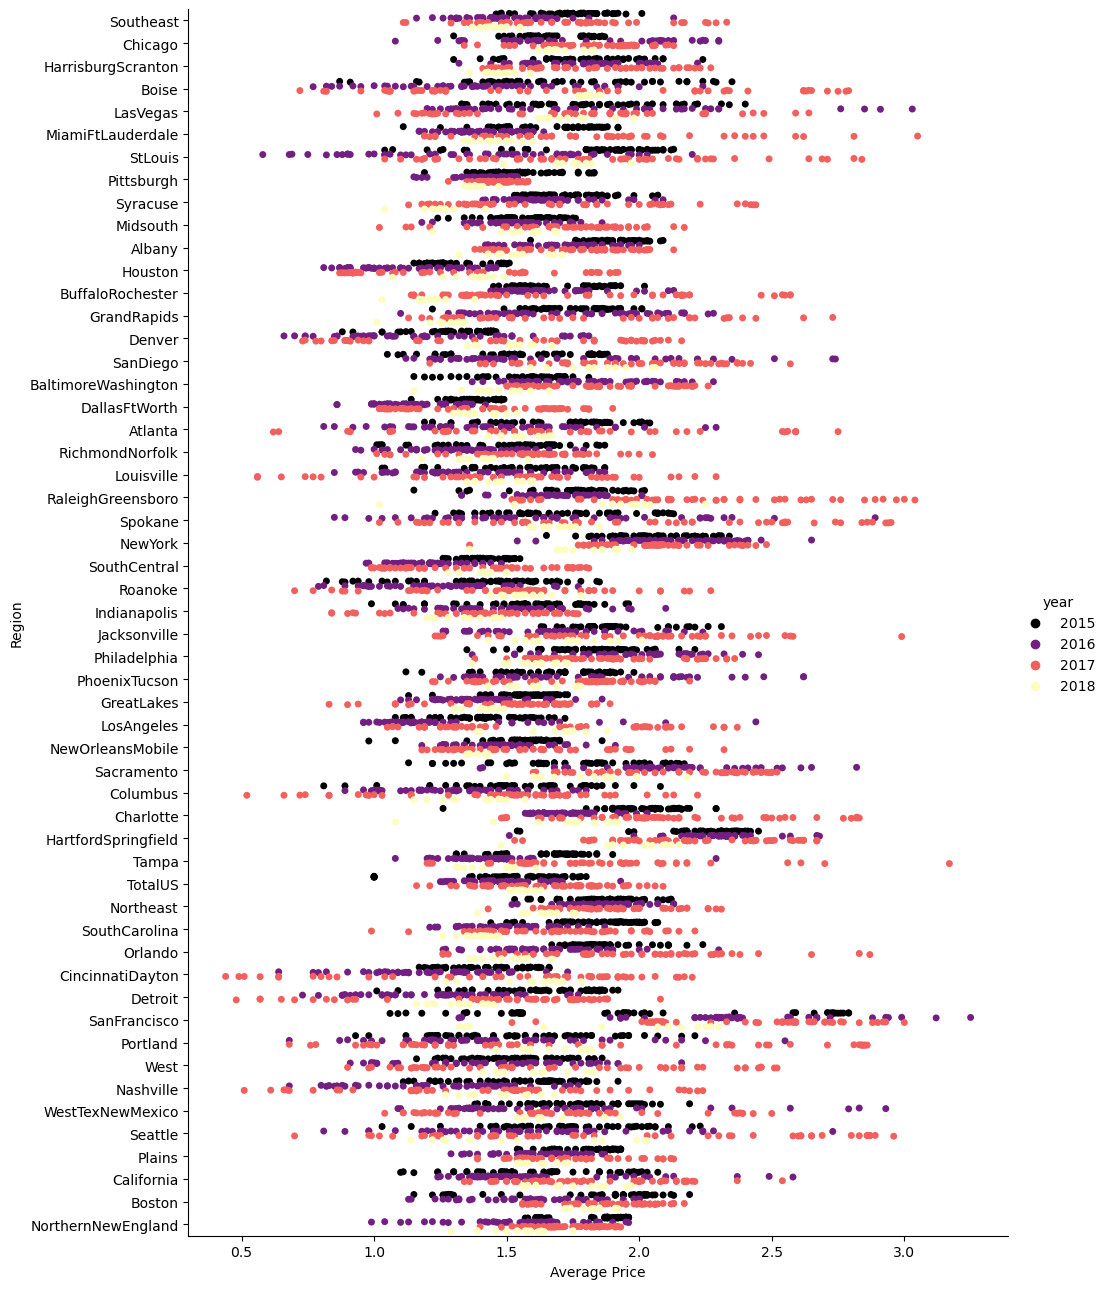

In [59]:
mask = df['type'] == 'organic'
g = sns.catplot(x='AveragePrice', y='region', data=df[mask],
                hue='year',
                height=13,  
                aspect=0.8,
                palette='magma',
                kind='strip',  
                dodge=True)
g.set_axis_labels("Average Price", "Region")
plt.show()

* The Average price of the avacado is high in the region San Francisco followed by RaleighGreensboro in the year 2017. The demand of the fruit is high and price also high in the year 2017.

# Pairplot 

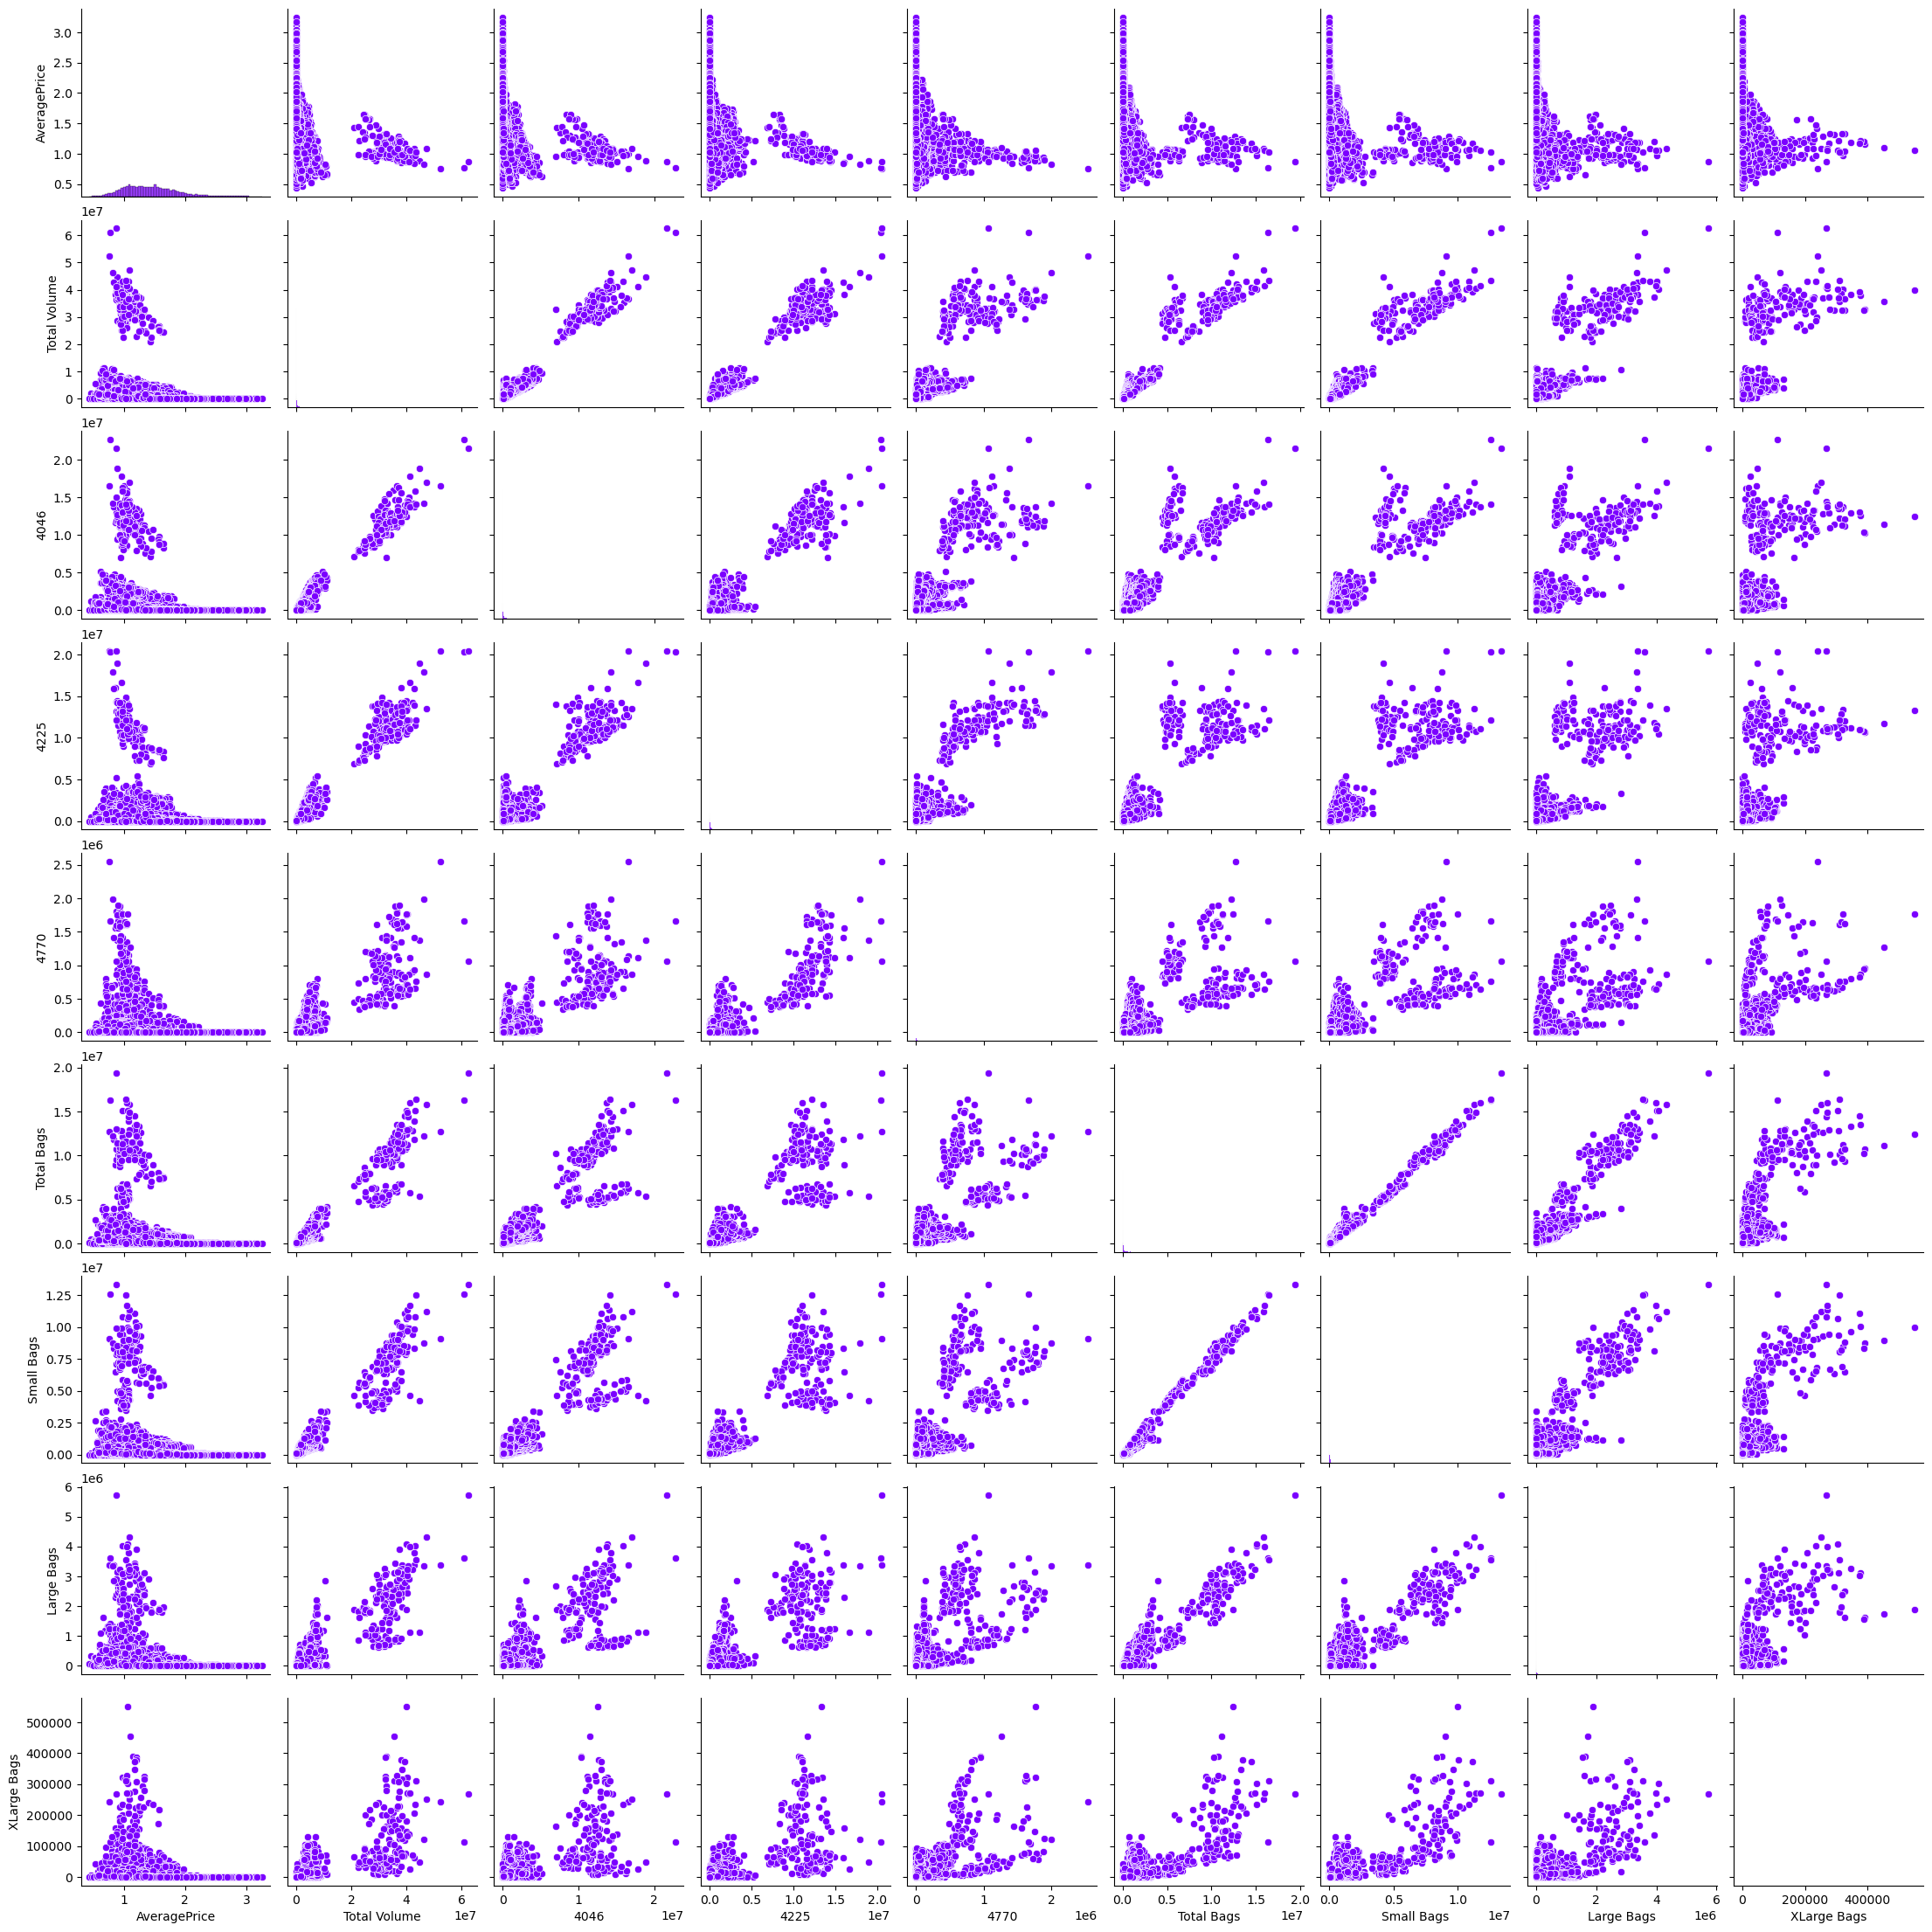

In [60]:
sns.pairplot(df2)

# Encoding categorical data

In [61]:
# Using Label Encoder on target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df3['region']=le.fit_transform(df3['region'])
df3['type']=le.fit_transform(df3['type'])
df3.head()

AveragePrice  Total Volume     4046      4225     4770  Total Bags  \
11569          1.75      27365.89  9307.34   3844.81   615.28    13598.46   
9593           1.49      17723.17  1189.35  15628.27     0.00      905.55   
10009          1.68       2896.72   161.68    206.96     0.00     2528.08   
1819           1.52      54956.80  3013.04  35456.88  1561.70    14925.18   
9333           1.64       1505.12     1.27   1129.50     0.00      374.35   

       Small Bags  Large Bags  XLarge Bags  type  region  Year  Month  
11569    13061.10      537.36          0.0     1      46  2015      1  
9593       905.55        0.00          0.0     1       8  2015      1  
10009     2528.08        0.00          0.0     1      16  2015      1  
1819     11264.80     3660.38          0.0     0      34  2015      1  
9333       186.67      187.68          0.0     1       3  2015      1

# Outliers Detection and Removal

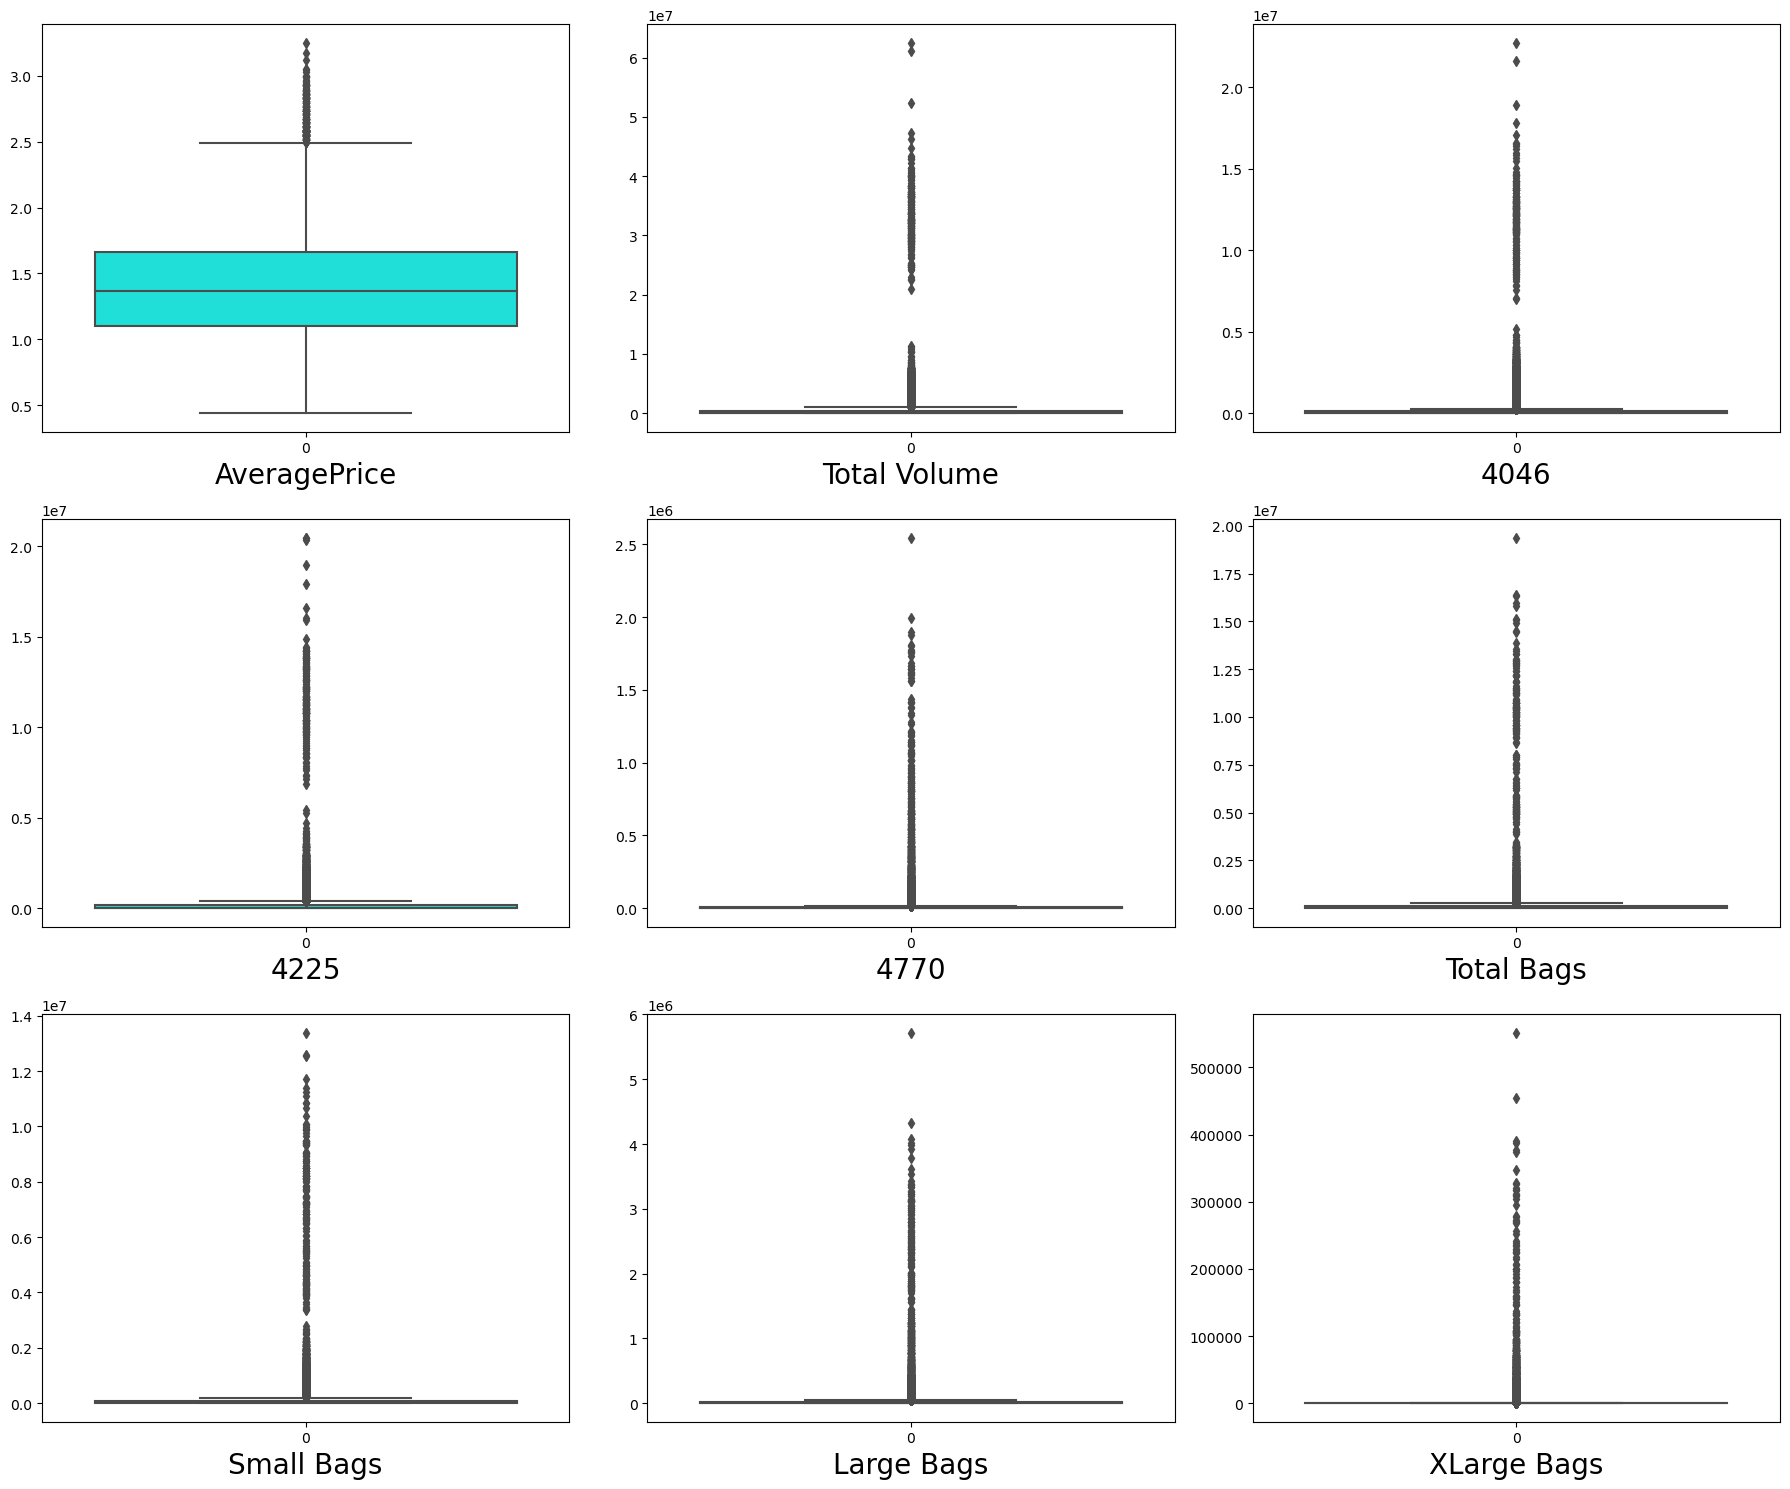

In [62]:
plt.figure(figsize=(18,15), facecolor='white')
plotnumber =1
for column in df2:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df2[column], palette='hsv')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [63]:
from scipy.stats import zscore
z = np.abs(zscore(df3))
threshold = 3
df4 = df3[(z<3).all(axis = 1)]

In [64]:
print("\033[1m"+'Shape of dataset after removing outliers :'+"\033[0m",df4.shape)

Shape of dataset after removing outliers : (17651, 13)


In [65]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((18249-17651)/18249)*100,'%')

Percentage Data Loss : 3.276891884486821 %


# Corrleation

In [66]:
df4.corr()

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.332056 -0.333577 -0.243988 -0.243465   
Total Volume     -0.332056      1.000000  0.876307  0.871592  0.647518   
4046             -0.333577      0.876307  1.000000  0.565118  0.492127   
4225             -0.243988      0.871592  0.565118  1.000000  0.620221   
4770             -0.243465      0.647518  0.492127  0.620221  1.000000   
Total Bags       -0.297323      0.912184  0.727981  0.757786  0.557980   
Small Bags       -0.275771      0.905648  0.706800  0.778761  0.571512   
Large Bags       -0.270915      0.640642  0.561060  0.451711  0.323747   
XLarge Bags      -0.152669      0.513741  0.415432  0.392030  0.495976   
type              0.613150     -0.415476 -0.341376 -0.383138 -0.321809   
region           -0.003242      0.076676  0.119067  0.011002 -0.095972   
Year              0.091704     -0.004866 -0.034636 -0.040234 -0.082054   
Month             0.149502     -0.018645 -0.015797 -0.019844 -0.027245   

              Total Bags  Small Bags  Large Bags  XLarge Bags      type  \
AveragePrice   -0.297323   -0.275771   -0.270915    -0.152669  0.613150   
Total Volume    0.912184    0.905648    0.640642     0.513741 -0.415476   
4046            0.727981    0.706800    0.561060     0.415432 -0.341376   
4225            0.757786    0.778761    0.451711     0.392030 -0.383138   
4770            0.557980    0.571512    0.323747     0.495976 -0.321809   
Total Bags      1.000000    0.978213    0.746946     0.581690 -0.378205   
Small Bags      0.978213    1.000000    0.593155     0.597700 -0.367593   
Large Bags      0.746946    0.593155    1.000000     0.296864 -0.286813   
XLarge Bags     0.581690    0.597700    0.296864     1.000000 -0.263734   
type           -0.378205   -0.367593   -0.286813    -0.263734  1.000000   
region          0.085892    0.065976    0.127635    -0.044338  0.018409   
Year            0.103442    0.086639    0.119543     0.108209  0.003867   
Month          -0.010916   -0.013018   -0.001457     0.002843 -0.009499   

                region      Year     Month  
AveragePrice -0.003242  0.091704  0.149502  
Total Volume  0.076676 -0.004866 -0.018645  
4046          0.119067 -0.034636 -0.015797  
4225          0.011002 -0.040234 -0.019844  
4770         -0.095972 -0.082054 -0.027245  
Total Bags    0.085892  0.103442 -0.010916  
Small Bags    0.065976  0.086639 -0.013018  
Large Bags    0.127635  0.119543 -0.001457  
XLarge Bags  -0.044338  0.108209  0.002843  
type          0.018409  0.003867 -0.009499  
region        1.000000 -0.004417  0.000119  
Year         -0.004417  1.000000 -0.175287  
Month         0.000119 -0.175287  1.000000

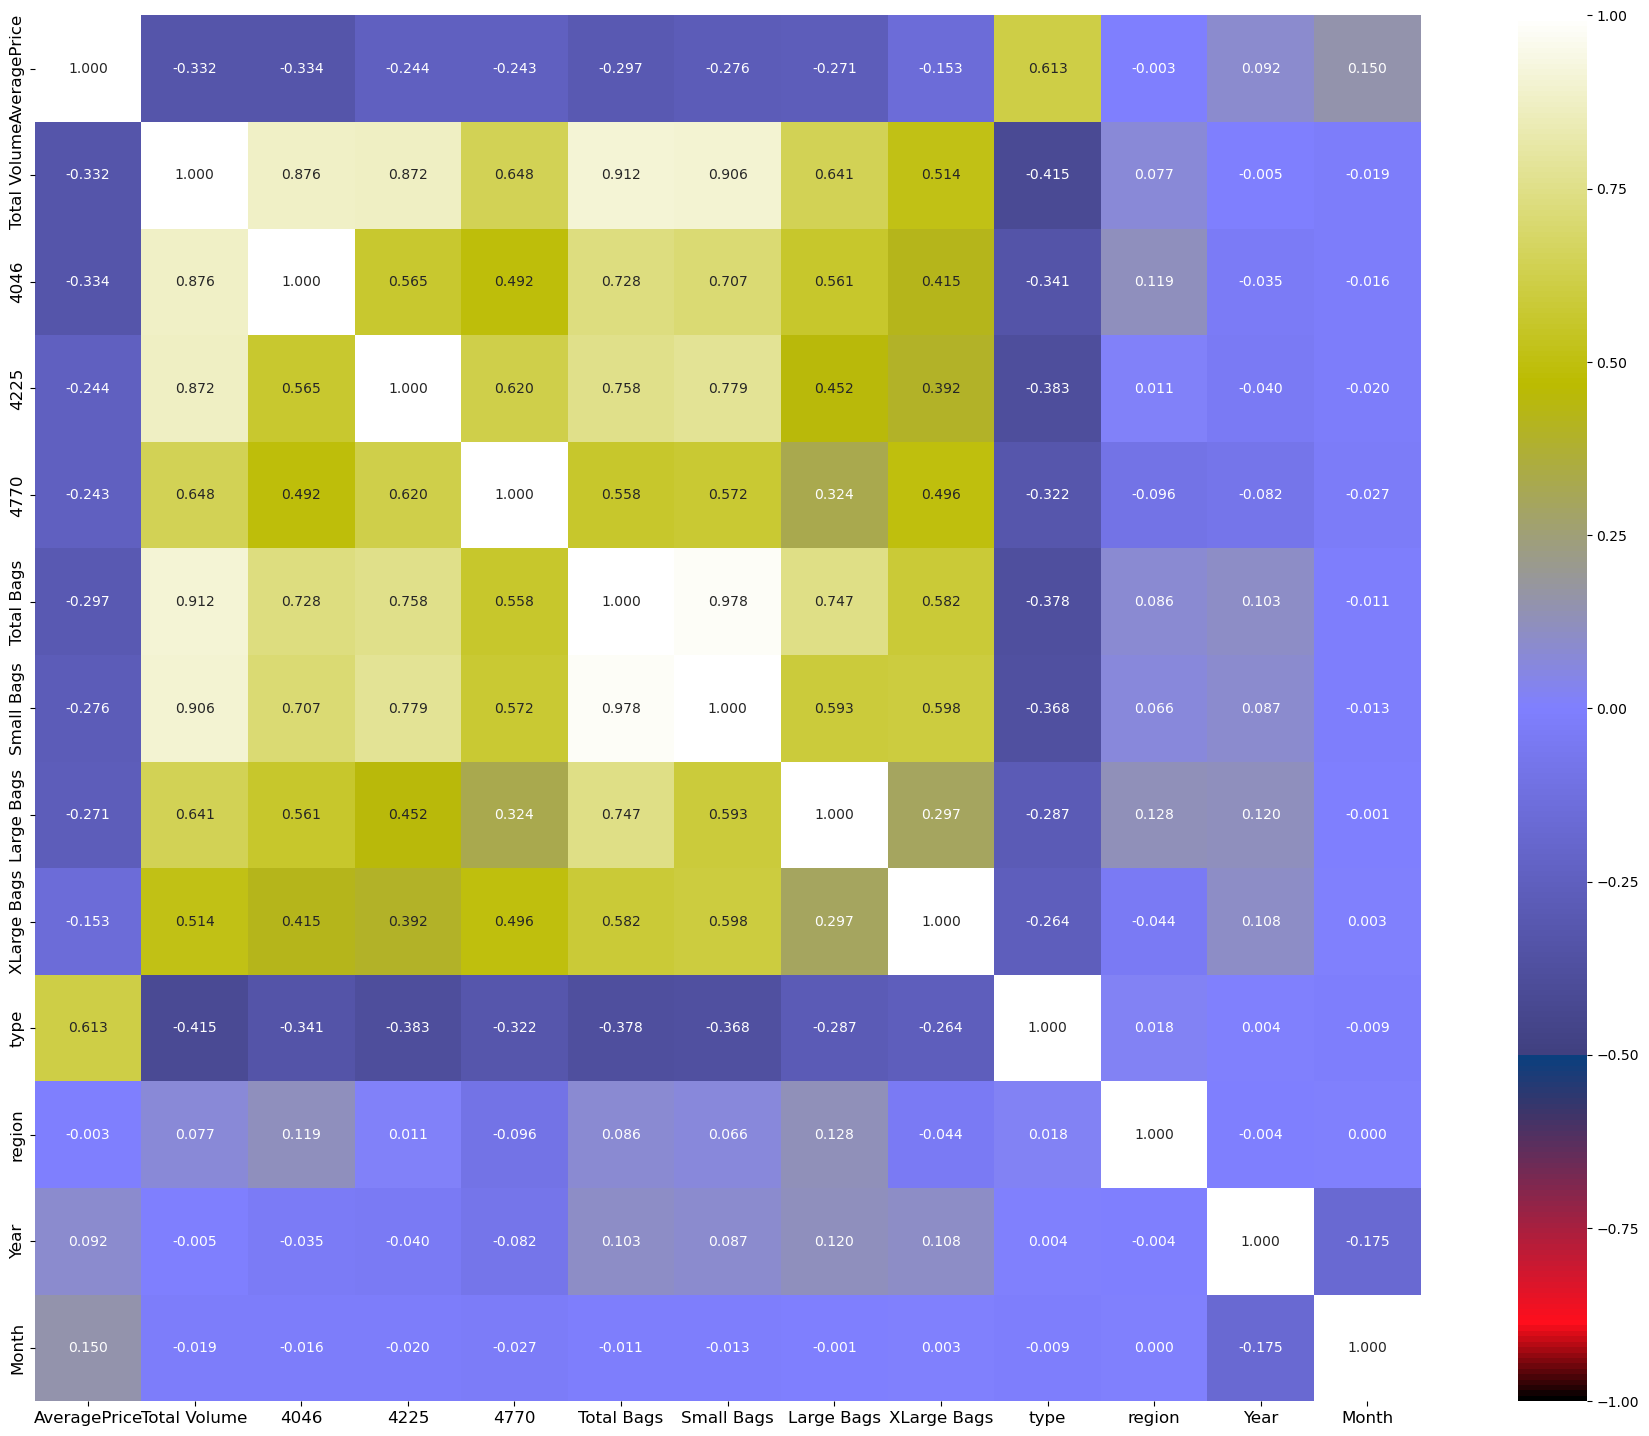

In [67]:
plt.figure(figsize=(25,18))
sns.heatmap(df4.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

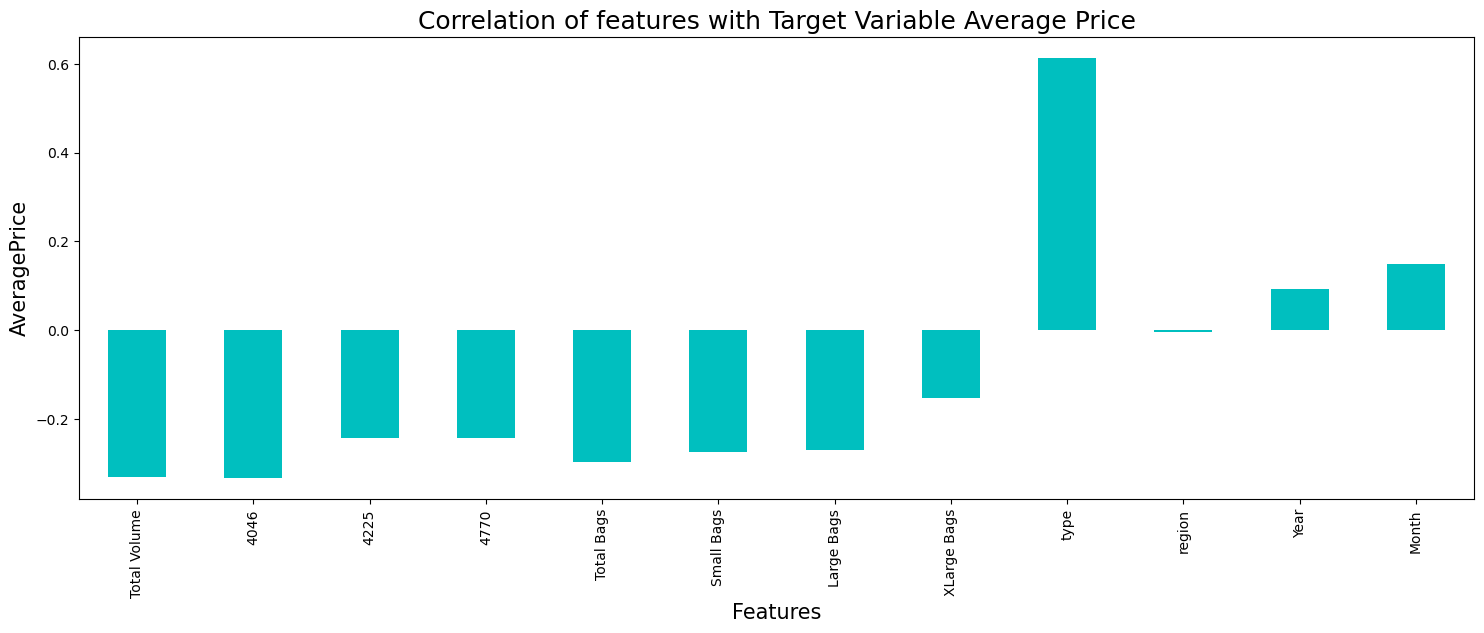

In [68]:
plt.figure(figsize = (18,6))
df4.corr()['AveragePrice'].drop(['AveragePrice']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('AveragePrice',fontsize=15)
plt.title('Correlation of features with Target Variable Average Price',fontsize = 18)
plt.show()

* Small bags are highly correlated with Total Bags correlation coeffient 0.978. It is natural as most of bags are small.
* Total volume is highly correleated 4046.
* 4046,4225,4770 are shows multicollinearity with Total Volume. These feature are nothing but Total avacado sold under particular grade, which are already counted in Total Volume. As we do not have any price data according each grade of avacado. These feature doesnot have any meaning in ML model.So gone drop them.
* Same goes with Total bags. Total bags is sum of all other type of bags. We gone keep drop Total bags and going to keep other differnt size bags counts features.
* Next is region feature, we also going drop this as it very poorly correlated with other features.

In [69]:
df4.drop(columns=['4046','4225','4770','region','Total Bags'],axis=1, inplace=True)

## Checking Multicollinearity between features using variance inflation factor

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df4.values,i) for i in range(df4.shape[1])]
vif['Features']= df4.columns
vif

VIF      Features
0  24.367038  AveragePrice
1   7.754106  Total Volume
2   7.707277    Small Bags
3   1.970395    Large Bags
4   1.693456   XLarge Bags
5   3.643636          type
6  19.857116          Year
7   4.212261         Month

* Removing Some of highly correlated features. But this will not work here as most of input features are correlated with each other either moderated or poorly.
* Another way to address Multicollinerity is to Scaled Data and then apply PCA.
* We will drop Year as it is less than 20% correlated with target feature and For most of input features correlated with less than 10%.

In [71]:
df4.drop(columns=['Year'],axis=1, inplace=True)

# Checking correlation with target variable after removal of multicollinearity

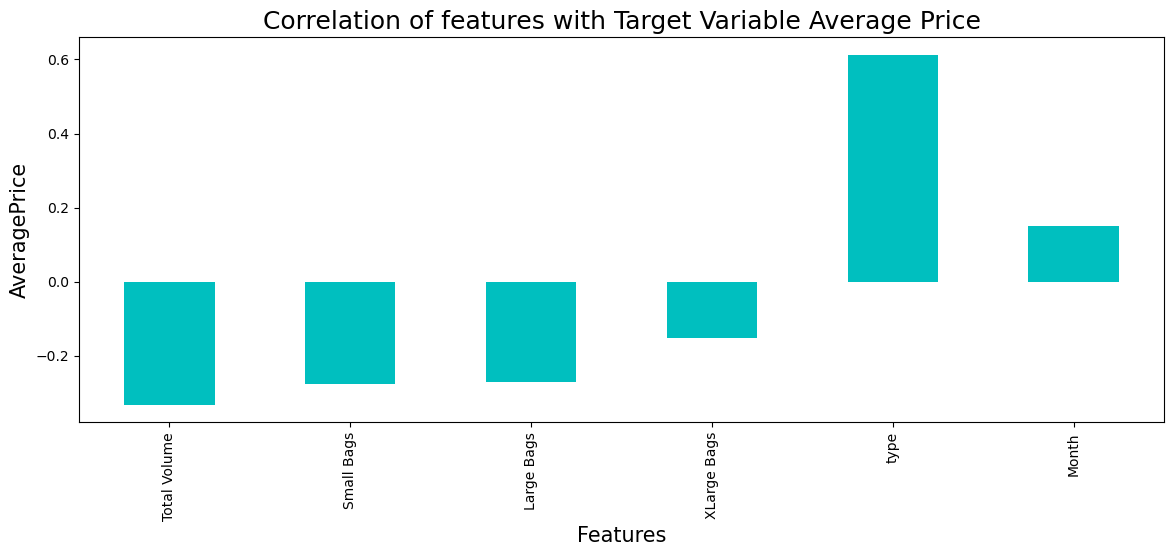

In [72]:
plt.figure(figsize = (14,5))
df4.corr()['AveragePrice'].drop(['AveragePrice']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('AveragePrice',fontsize=15)
plt.title('Correlation of features with Target Variable Average Price',fontsize = 18)
plt.show()

### Skewness of features

In [73]:
df4.skew()

AveragePrice    0.377432
Total Volume    3.767138
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
Month           0.107408
dtype: float64

Transforming skewness through log transform

In [74]:
for col in df4.columns:
    if df4.skew().loc[col]>0.55:
        df4[col]=np.log1p(df4[col])

# Standard Scaling

In [75]:
X = df4.drop('AveragePrice', axis=1)
Y = df4['AveragePrice']

In [76]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# Model Building

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (11826, 6)
Training target vector size: (11826,)
Test feature matrix size: (5825, 6)
Test target vector size: (5825,)


In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.46818596260749945 on Random_state 776


# Linear Regression

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=557, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Values:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Values:'+'\033[0m\n',Y_test)

Predicted Values:
 [1.25449726 1.70849699 1.08412225 ... 1.22382508 1.51597973 1.22001895]


Actual Values:
 4860     1.01
10574    1.52
9014     1.22
5306     1.11
7286     1.35
         ... 
10948    1.82
956      0.92
7812     1.46
15478    1.54
5099     1.09
Name: AveragePrice, Length: 5825, dtype: float64


In [81]:
# Linear Regression Evaluation Matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 0.22389498573836647
Mean squared error : 0.08072433400137938
Root Mean Squared Error: 0.28412028086952784


 R2 Score :
0.4540218966596161


In [82]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =5)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.39232666180063314


# Applying other Regression Model, Evaluation & Crossvalidation

In [83]:
rf = RandomForestRegressor(n_estimators = 70 ,max_depth=25)
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor(max_depth=25,learning_rate=0.1)
rd=Ridge(alpha=0.01)
xgb=XGBRegressor()
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')



 Error of  RandomForestRegressor(max_depth=25, n_estimators=70) :
Mean absolute error : 0.16364027640201714
Mean squared error : 0.04769517025527526
Root Mean Squared Error: 0.2183922394575303


 R2 Score :
0.677414265269418


 Error of  Ridge(alpha=0.01) :
Mean absolute error : 0.22389499347158226
Mean squared error : 0.08072433653144706
Root Mean Squared Error: 0.2841202853219866


 R2 Score :
0.4540218795475326


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.2133596566523605
Mean squared error : 0.09230825751072962
Root Mean Squared Error: 0.30382274027914635


 R2 Score :
0.3756741634126989


 Error of  AdaBoostRegressor(learning_rate=0.1) :
Mean absolute error : 0.22108965855505555
Mean squared error : 0.07684093754899278
Root Mean Squared Error: 0.27720197969890614


 R2 Score :
0.48028720384142065


 Error of  GradientBoostingRegressor(max_depth=25) :
Mean absolute error : 0.20446588616639844
Mean squared error : 0.08442307439545367
Root Mean Squared Error: 0.29

In [84]:
# Cross Validation
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : RandomForestRegressor(max_depth=25, n_estimators=70) :

Mean CV Score : 0.29533190397411424


Cross Validation Score : Ridge(alpha=0.01) :

Mean CV Score : 0.39232666798791777


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : -0.09907538593472756


Cross Validation Score : AdaBoostRegressor(learning_rate=0.1) :

Mean CV Score : 0.3476248926515157


Cross Validation Score : GradientBoostingRegressor(max_depth=25) :

Mean CV Score : -0.06153049723322932


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot

Among all Model Random Forest Regressor gave us maximum R2 score of 0.6752 and minimum RMSE value of 0.2189. So We will perform Hyper Parameter Tuning on Random Forest Regressor.

# Hyper Parameter Tuning : GridSearchCV

In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [88]:
parameter = {
    'n_estimators': [100, 200, 300],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],  # Correct values
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'random_state': [42]
}

In [90]:
GCV = GridSearchCV(RandomForestRegressor(), parameter, cv=3, n_jobs=-1, verbose=3)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

RSCV = RandomizedSearchCV(
    RandomForestRegressor(), 
    parameter, 
    n_iter=20,  # Number of parameter settings that are sampled
    cv=5, 
    n_jobs=-1, 
    verbose=3, 
    random_state=42
)
RSCV.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
GCV.fit(X_train, Y_train)

I have unable to find final model due to taking too much time i have try to multiple method but unable to find it solution if you gide after that code.